# Import library ที่ใช้และ Model สำหรับ TrainAI

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from plotly.graph_objs import *
import plotly.express as px

# ทำการสำรวจข้อมูลทั้งหมด

In [2]:
# โหลดข้อมูลจาก CSV
data = pd.read_csv('archive/cheeses.csv')

# ดูคอลัมน์ทั้งหมด
data.head(25)

cheese  \
0                              Aarewasser   
1                        Abbaye de Belloc   
2                        Abbaye de Belval   
3                       Abbaye de Citeaux   
4                         Abbaye de Tamié   
5                      Abbaye de Timadeuc   
6                 Abbaye du Mont des Cats   
7                            Abbot’s Gold   
8                                 Abertam   
9                               Abondance   
10                               Acapella   
11                             Accasciato   
12                                 Ackawi   
13                                  Acorn   
14                                Adelost   
15                       ADL Brick Cheese   
16                       ADL Mild Cheddar   
17                  Affidelice au Chablis   
18        Affineur Walo Rotwein Sennechäs   
19                          Afuega'l Pitu   
20                   Aged British Cheddar   
21  Aged Cashew & Blue Green Algae Cheese   
22        Aged Cashew & Brazil Nut Cheese   
23             Aged Cashew & Dulse Cheese   
24         Aged Cashew & Hemp Seed Cheese   

                                                  url              milk  \
0                  https://www.cheese.com/aarewasser/               cow   
1            https://www.cheese.com/abbaye-de-belloc/             sheep   
2            https://www.cheese.com/abbaye-de-belval/               cow   
3           https://www.cheese.com/abbaye-de-citeaux/               cow   
4                       https://www.cheese.com/tamie/               cow   
5          https://www.cheese.com/abbaye-de-timadeuc/               cow   
6     https://www.cheese.com/abbaye-du-mont-des-cats/               cow   
7                 https://www.cheese.com/abbots-gold/               cow   
8                     https://www.cheese.com/abertam/             sheep   
9                   https://www.cheese.com/abondance/               cow   
10                   https://www.cheese.com/acapella/              goat   
11                 https://www.cheese.com/accasciato/      buffalo, cow   
12                     https://www.cheese.com/ackawi/  cow, goat, sheep   
13                      https://www.cheese.com/acorn/             sheep   
14                    https://www.cheese.com/adelost/               cow   
15           https://www.cheese.com/adl-brick-cheese/               cow   
16           https://www.cheese.com/adl-mild-cheddar/               cow   
17      https://www.cheese.com/affidelice-au-chablis/               cow   
18  https://www.cheese.com/affineur-walo-rotwein-s...               cow   
19               https://www.cheese.com/afuegal-pitu/               cow   
20       https://www.cheese.com/aged-british-cheddar/               cow   
21  https://www.cheese.com/aged-cashew-blue-green-...               NaN   
22  https://www.cheese.com/aged-cashew-brazil-nut-...               NaN   
23   https://www.cheese.com/aged-cashew-dulse-cheese/               NaN   
24  https://www.cheese.com/aged-cashew-hemp-seed-c...               NaN   

                                              country                region  \
0                                         Switzerland                   NaN   
1                                              France           Pays Basque   
2                                              France                   NaN   
3                                              France              Burgundy   
4                                              France                Savoie   
5                                              France  province of Brittany   
6                                              France    Nord-Pas-de-Calais   
7              England, Great Britain, United Kingdom       North Yorkshire   
8                                      Czech Republic          Karlovy Vary   
9                                              France                   NaN   
10                                      Unit

In [3]:
# เช็คจำนวนค่าที่เป็น NaN ในแต่ละคอลัมน์
print(data.isnull().sum())

cheese                0
url                   0
milk                 36
country              11
region              332
family              698
type                 13
fat_content         939
calcium_content    1162
texture              58
rind                242
color               142
flavor               98
aroma               258
vegetarian          439
vegan               439
synonyms            893
alt_spellings      1078
producers           400
dtype: int64


In [4]:
# ดูเปอร์เซ็นต์ของค่า NaN ในแต่ละคอลัมน์
print((data.isnull().sum() / len(data)) * 100)

cheese              0.000000
url                 0.000000
milk                3.032856
country             0.926706
region             27.969671
family             58.803707
type                1.095198
fat_content        79.106992
calcium_content    97.893850
texture             4.886268
rind               20.387532
color              11.962932
flavor              8.256108
aroma              21.735468
vegetarian         36.983993
vegan              36.983993
synonyms           75.231676
alt_spellings      90.817186
producers          33.698399
dtype: float64


In [5]:
#ดูจำนวนข้อมูลที่ไม่เป็น NaN
print(data.info())
print("-"*25)

print("shape of the dataset -->>",np.shape(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cheese           1187 non-null   object
 1   url              1187 non-null   object
 2   milk             1151 non-null   object
 3   country          1176 non-null   object
 4   region           855 non-null    object
 5   family           489 non-null    object
 6   type             1174 non-null   object
 7   fat_content      248 non-null    object
 8   calcium_content  25 non-null     object
 9   texture          1129 non-null   object
 10  rind             945 non-null    object
 11  color            1045 non-null   object
 12  flavor           1089 non-null   object
 13  aroma            929 non-null    object
 14  vegetarian       748 non-null    object
 15  vegan            748 non-null    object
 16  synonyms         294 non-null    object
 17  alt_spellings    109 non-null    

In [6]:
#เช็คข้อมูลทางสถิติ
data.describe().T

count unique                                        top freq
cheese           1187   1187                                 Aarewasser    1
url              1187   1187         https://www.cheese.com/aarewasser/    1
milk             1151     21                                        cow  696
country          1176     82                              United States  305
region            855    349                                  Wisconsin   67
family            489     21                                       Blue   94
type             1174     84                         semi-hard, artisan  133
fat_content       248     85                                        45%   50
calcium_content    25     24                                492 mg/100g    2
texture          1129    309                                     creamy  162
rind              945     12                                    natural  439
color            1045     17                                      white  281
flavor           1089    626                                     creamy   34
aroma             929    330                                       rich   56
vegetarian        748      2                                      False  386
vegan             748      2                                      False  742
synonyms          294    292                 Rupp Vorarlberger Bergkäse    3
alt_spellings     109    109  Tamié, Trappiste de Tamie, Abbey of Tamie    1
producers         787    318                                    Sartori   27

In [7]:
#เช็คจำนวนของทุกไอเท็มในคอลัมน์

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in cheese -->> 
 cheese
Aarewasser                           1
Morbier                              1
Moose                                1
Moonlight Chaource                   1
Moonglo                              1
                                    ..
Carrick                              1
Carre de l'Est                       1
Carr Valley Glacier Wildfire Blue    1
Caronzola                            1
Swiss cheese                         1
Name: count, Length: 1187, dtype: int64
-------------------------
counts of items in url -->> 
 url
https://www.cheese.com/aarewasser/                           1
https://www.cheese.com/morbier/                              1
https://www.cheese.com/moose/                                1
https://www.cheese.com/moonlight-chaource/                   1
https://www.cheese.com/moonglo/                              1
                                                            ..
https://www.cheese.com/carrick/                      

In [8]:
#ดูข้อมูลทั้งหมดในคอลัมน์ที่ไม่ซ้ำกัน
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>cheese column  :  
['Aarewasser' 'Abbaye de Belloc' 'Abbaye de Belval' ... 'Swaledale'
 'Sweet Style Swiss' 'Swiss cheese']
**************************************************
All items in the ---->>>url column  :  
['https://www.cheese.com/aarewasser/'
 'https://www.cheese.com/abbaye-de-belloc/'
 'https://www.cheese.com/abbaye-de-belval/' ...
 'https://www.cheese.com/swaledale/'
 'https://www.cheese.com/sweet-style-swiss/'
 'https://www.cheese.com/swiss/']
**************************************************
All items in the ---->>>milk column  :  
['cow' 'sheep' 'goat' 'buffalo, cow' 'cow, goat, sheep' nan 'goat, sheep'
 'cow, water buffalo' 'cow, goat' 'cow, sheep' 'buffalo' 'water buffalo'
 'plant-based' 'cow, goat, water buffalo' 'yak'
 'cow, goat, sheep, water buffalo' 'camel' 'cow, yak'
 'buffalo, cow, sheep' 'moose' 'donkey' 'goat, yak']
**************************************************
All items in the ---->>>country column  :  
['Switzerland' 'France' 'E

In [9]:
#แยกประเภทข้อมูลทั้งหมดในคอลัมน์
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['cheese', 'url', 'milk', 'country', 'region', 'family', 'type',
       'fat_content', 'calcium_content', 'texture', 'rind', 'color', 'flavor',
       'aroma', 'vegetarian', 'vegan', 'synonyms', 'alt_spellings',
       'producers'],
      dtype='object')
 Numerical_columns ----->>> Index([], dtype='object') 
 Discrete_columns ---->>> Index([], dtype='object') 
 Continous_cols ----->> Index([], dtype='object') 
 Nominal Columns --->> vegetarian    2
vegan         2
dtype: int64


In [10]:
# Describe object :
data.describe(include="O").T

count unique                                        top freq
cheese           1187   1187                                 Aarewasser    1
url              1187   1187         https://www.cheese.com/aarewasser/    1
milk             1151     21                                        cow  696
country          1176     82                              United States  305
region            855    349                                  Wisconsin   67
family            489     21                                       Blue   94
type             1174     84                         semi-hard, artisan  133
fat_content       248     85                                        45%   50
calcium_content    25     24                                492 mg/100g    2
texture          1129    309                                     creamy  162
rind              945     12                                    natural  439
color            1045     17                                      white  281
flavor           1089    626                                     creamy   34
aroma             929    330                                       rich   56
vegetarian        748      2                                      False  386
vegan             748      2                                      False  742
synonyms          294    292                 Rupp Vorarlberger Bergkäse    3
alt_spellings     109    109  Tamié, Trappiste de Tamie, Abbey of Tamie    1
producers         787    318                                    Sartori   27

# เริ่ม Cleansing Data

### ดูค่าเฉลี่ยข้อมูลที่เป็น null

In [11]:
data.isna().mean()

cheese             0.000000
url                0.000000
milk               0.030329
country            0.009267
region             0.279697
family             0.588037
type               0.010952
fat_content        0.791070
calcium_content    0.978939
texture            0.048863
rind               0.203875
color              0.119629
flavor             0.082561
aroma              0.217355
vegetarian         0.369840
vegan              0.369840
synonyms           0.752317
alt_spellings      0.908172
producers          0.336984
dtype: float64

### เนื่องจากว่าคอลัมน์ url นั้นเป็นส่วนของการอ้างอิงที่มาของชีส ดังนั้นเราจึงจะไม่ใช่ในการทำ ML จึงจะเอาออก

In [12]:
data=data.drop(columns="url",axis=1)
data.head(15)

cheese              milk  \
0                Aarewasser               cow   
1          Abbaye de Belloc             sheep   
2          Abbaye de Belval               cow   
3         Abbaye de Citeaux               cow   
4           Abbaye de Tamié               cow   
5        Abbaye de Timadeuc               cow   
6   Abbaye du Mont des Cats               cow   
7              Abbot’s Gold               cow   
8                   Abertam             sheep   
9                 Abondance               cow   
10                 Acapella              goat   
11               Accasciato      buffalo, cow   
12                   Ackawi  cow, goat, sheep   
13                    Acorn             sheep   
14                  Adelost               cow   

                                              country                region  \
0                                         Switzerland                   NaN   
1                                              France           Pays Basque   
2                                              France                   NaN   
3                                              France              Burgundy   
4                                              France                Savoie   
5                                              France  province of Brittany   
6                                              France    Nord-Pas-de-Calais   
7              England, Great Britain, United Kingdom       North Yorkshire   
8                                      Czech Republic          Karlovy Vary   
9                                              France                   NaN   
10                                      United States            California   
11                                              Italy              Campania   
12  Cyprus, Egypt, Israel, Jordan, Lebanon, Middle...                     +   
13                                     United Kingdom              Bethania   
14                                             Sweden                   NaN   

     family                        type fat_content calcium_content  \
0       NaN                   semi-soft         NaN             NaN   
1       NaN          semi-hard, artisan         NaN             NaN   
2       NaN                   semi-hard      40-46%             NaN   
3       NaN  semi-soft, artisan, brined         NaN             NaN   
4       NaN               soft, artisan         NaN             NaN   
5       NaN                   semi-hard         NaN             NaN   
6       NaN  semi-soft, artisan, brined         50%             NaN   
7   Cheddar                   semi-hard         NaN             NaN   
8       NaN               hard, artisan         45%             NaN   
9       NaN          semi-hard, artisan         NaN             NaN   
10      NaN          soft, soft-ripened         NaN             NaN   
11      NaN                   semi-hard         NaN             NaN   
12     Feta                soft, brined         NaN             NaN   
13      NaN               hard, artisan         52%             NaN   
14     Blue      semi-soft, blue-veined         50%             NaN   

                              texture     rind        color  \
0                             buttery   washed       yellow   
1                 creamy, dense, firm  natural       yellow   
2                             elastic   washed        ivory   
3               creamy, dense, smooth   washed        white   
4                creamy, open, smooth   washed        white   
5                                soft   washed  pale yellow   
6                      smooth, supple   washed  pale yellow   
7   creamy, crumbly, dense, semi firm  natural  pale yellow   
8                                firm  natural  pale yellow   
9                              creamy  natural  pale yellow   
10                                NaN      NaN          NaN   
11                               firm  natural  pale yellow   
12           el

In [13]:
# Structure Cleaning :
# Remove '%' and 'mg/100g' from the columns

data['fat_content'] = data['fat_content'].str.replace('%', '').str.replace('g/100g','').str.replace('-','')
data['calcium_content'] = data['calcium_content'].str.replace(' mg/100g', '')

data.head(25)

cheese              milk  \
0                              Aarewasser               cow   
1                        Abbaye de Belloc             sheep   
2                        Abbaye de Belval               cow   
3                       Abbaye de Citeaux               cow   
4                         Abbaye de Tamié               cow   
5                      Abbaye de Timadeuc               cow   
6                 Abbaye du Mont des Cats               cow   
7                            Abbot’s Gold               cow   
8                                 Abertam             sheep   
9                               Abondance               cow   
10                               Acapella              goat   
11                             Accasciato      buffalo, cow   
12                                 Ackawi  cow, goat, sheep   
13                                  Acorn             sheep   
14                                Adelost               cow   
15                       ADL Brick Cheese               cow   
16                       ADL Mild Cheddar               cow   
17                  Affidelice au Chablis               cow   
18        Affineur Walo Rotwein Sennechäs               cow   
19                          Afuega'l Pitu               cow   
20                   Aged British Cheddar               cow   
21  Aged Cashew & Blue Green Algae Cheese               NaN   
22        Aged Cashew & Brazil Nut Cheese               NaN   
23             Aged Cashew & Dulse Cheese               NaN   
24         Aged Cashew & Hemp Seed Cheese               NaN   

                                              country                region  \
0                                         Switzerland                   NaN   
1                                              France           Pays Basque   
2                                              France                   NaN   
3                                              France              Burgundy   
4                                              France                Savoie   
5                                              France  province of Brittany   
6                                              France    Nord-Pas-de-Calais   
7              England, Great Britain, United Kingdom       North Yorkshire   
8                                      Czech Republic          Karlovy Vary   
9                                              France                   NaN   
10                                      United States            California   
11                                              Italy              Campania   
12  Cyprus, Egypt, Israel, Jordan, Lebanon, Middle...                     +   
13                                     United Kingdom              Bethania   
14                                             Sweden                   NaN   
15                                             Canada  Prince Edward Island   
16                                             Canada  Prince Edward Island   
17                                             France              Burgundy   
18                                        Switzerland                   NaN   
19                                              Spain              Asturias   
20                                      United States                    NY   
21                                      United States           Brooklyn NY   
22                                      United States           Brooklyn NY   
23                                      United States           Brooklyn NY   
24                                      United States           Brooklyn NY   

          family                        type fat_content calcium_content  \
0            NaN                   semi-soft         NaN             NaN   
1            NaN          semi-hard, artisan         NaN             NaN   
2            NaN                   semi-hard        4046             NaN   
3            NaN  semi-soft, artisan,

In [14]:
# Cleaning the Nuerical Features from the Null Values :

for col in data.select_dtypes("number").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

cheese   milk        country                      region  \
0            Aarewasser    cow    Switzerland                         NaN   
1      Abbaye de Belloc  sheep         France                 Pays Basque   
2      Abbaye de Belval    cow         France                         NaN   
3     Abbaye de Citeaux    cow         France                    Burgundy   
4       Abbaye de Tamié    cow         France                      Savoie   
...                 ...    ...            ...                         ...   
1182          Sveciaost    cow         Sweden          Low-laying regions   
1183               Swag   goat      Australia             South Australia   
1184          Swaledale  sheep        England  Swaledale, North Yorkshire   
1185  Sweet Style Swiss    NaN    Switzerland                         NaN   
1186       Swiss cheese    cow  United States                         NaN   

            family                        type fat_content calcium_content  \
0              NaN                   semi-soft         NaN             NaN   
1              NaN          semi-hard, artisan         NaN             NaN   
2              NaN                   semi-hard        4046             NaN   
3              NaN  semi-soft, artisan, brined         NaN             NaN   
4              NaN               soft, artisan         NaN             NaN   
...            ...                         ...         ...             ...   
1182           NaN           semi-hard, brined          45             NaN   
1183           NaN         fresh firm, artisan         NaN             NaN   
1184           NaN                        hard         NaN             NaN   
1185           NaN          semi-hard, artisan         NaN             NaN   
1186  Swiss Cheese    hard, artisan, processed        7.8              NaN   

                    texture        rind        color                 flavor  \
0                   buttery      washed       yellow                  sweet   
1       creamy, dense, firm     natural       yellow          burnt caramel   
2                   elastic      washed        ivory                    NaN   
3     creamy, dense, smooth      washed        white  acidic, milky, smooth   
4      creamy, open, smooth      washed        white          fruity, nutty   
...                     ...         ...          ...                    ...   
1182         creamy, supple    rindless  pale yellow                 acidic   
1183        creamy, crumbly  ash coated        white         acidic, creamy   
1184              semi firm         NaN       yellow          smooth, sweet   
1185           firm, supple       waxed          NaN                  nutty   
1186                   firm    rindless  pale yellow           nutty, sweet   

                  aroma vegetarian  vegan                     synonyms  \
0               buttery      False  False                          NaN   
1              lanoline       True  False  Abbaye Notre-Dame de Belloc   
2              aromatic      False  False                          NaN   
3     barnyardy, earthy      False  False                          NaN   
4     perfumed, pungent      False  False                          NaN   
...                 ...        ...    ...                          ...   
1182                NaN      False  False                          NaN   
1183              fresh       True  False                          NaN   
1184             floral       True  False       Swaledale Sheep Cheese   
1185       nutty, sweet      False  False                          NaN   
1186                NaN       True  False        American Swiss Cheese   

                                  alt_spellings                producers  
0                                           NaN                     Jumi  
1                                           NaN                      NaN  
2                                           NaN                      NaN  
3                

In [15]:
# Cleaning the Object or Categorical Features from the Null Values :

for col in data.select_dtypes("object").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

cheese   milk        country                      region  \
0            Aarewasser    cow    Switzerland                   Wisconsin   
1      Abbaye de Belloc  sheep         France                 Pays Basque   
2      Abbaye de Belval    cow         France                   Wisconsin   
3     Abbaye de Citeaux    cow         France                    Burgundy   
4       Abbaye de Tamié    cow         France                      Savoie   
...                 ...    ...            ...                         ...   
1182          Sveciaost    cow         Sweden          Low-laying regions   
1183               Swag   goat      Australia             South Australia   
1184          Swaledale  sheep        England  Swaledale, North Yorkshire   
1185  Sweet Style Swiss    cow    Switzerland                   Wisconsin   
1186       Swiss cheese    cow  United States                   Wisconsin   

            family                        type fat_content calcium_content  \
0             Blue                   semi-soft          45             492   
1             Blue          semi-hard, artisan          45             492   
2             Blue                   semi-hard        4046             492   
3             Blue  semi-soft, artisan, brined          45             492   
4             Blue               soft, artisan          45             492   
...            ...                         ...         ...             ...   
1182          Blue           semi-hard, brined          45             492   
1183          Blue         fresh firm, artisan          45             492   
1184          Blue                        hard          45             492   
1185          Blue          semi-hard, artisan          45             492   
1186  Swiss Cheese    hard, artisan, processed        7.8              492   

                    texture        rind        color                 flavor  \
0                   buttery      washed       yellow                  sweet   
1       creamy, dense, firm     natural       yellow          burnt caramel   
2                   elastic      washed        ivory                 creamy   
3     creamy, dense, smooth      washed        white  acidic, milky, smooth   
4      creamy, open, smooth      washed        white          fruity, nutty   
...                     ...         ...          ...                    ...   
1182         creamy, supple    rindless  pale yellow                 acidic   
1183        creamy, crumbly  ash coated        white         acidic, creamy   
1184              semi firm     natural       yellow          smooth, sweet   
1185           firm, supple       waxed        white                  nutty   
1186                   firm    rindless  pale yellow           nutty, sweet   

                  aroma vegetarian  vegan                     synonyms  \
0               buttery      False  False   Rupp Vorarlberger Bergkäse   
1              lanoline       True  False  Abbaye Notre-Dame de Belloc   
2              aromatic      False  False   Rupp Vorarlberger Bergkäse   
3     barnyardy, earthy      False  False   Rupp Vorarlberger Bergkäse   
4     perfumed, pungent      False  False   Rupp Vorarlberger Bergkäse   
...                 ...        ...    ...                          ...   
1182               rich      False  False   Rupp Vorarlberger Bergkäse   
1183              fresh       True  False   Rupp Vorarlberger Bergkäse   
1184             floral       True  False       Swaledale Sheep Cheese   
1185       nutty, sweet      False  False   Rupp Vorarlberger Bergkäse   
1186               rich       True  False        American Swiss Cheese   

                                  alt_spellings                producers  
0                                 Aged Airedale                     Jumi  
1                                 Aged Airedale                  Sartori  
2                                 Aged Airedale                  Sartori  
3                

In [16]:
# Here i will Check again the Null Values :
# we see that there NO any Null Values Any more

data.isna().sum()

cheese             0
milk               0
country            0
region             0
family             0
type               0
fat_content        0
calcium_content    0
texture            0
rind               0
color              0
flavor             0
aroma              0
vegetarian         0
vegan              0
synonyms           0
alt_spellings      0
producers          0
dtype: int64

## Explaination
หลังจากที่ได้มีการ Cleaning data แล้ว เราจะมาพล็อตกราฟเพื่อหาความสัมพันธ์ของข้อมูล

## DataAnalysis

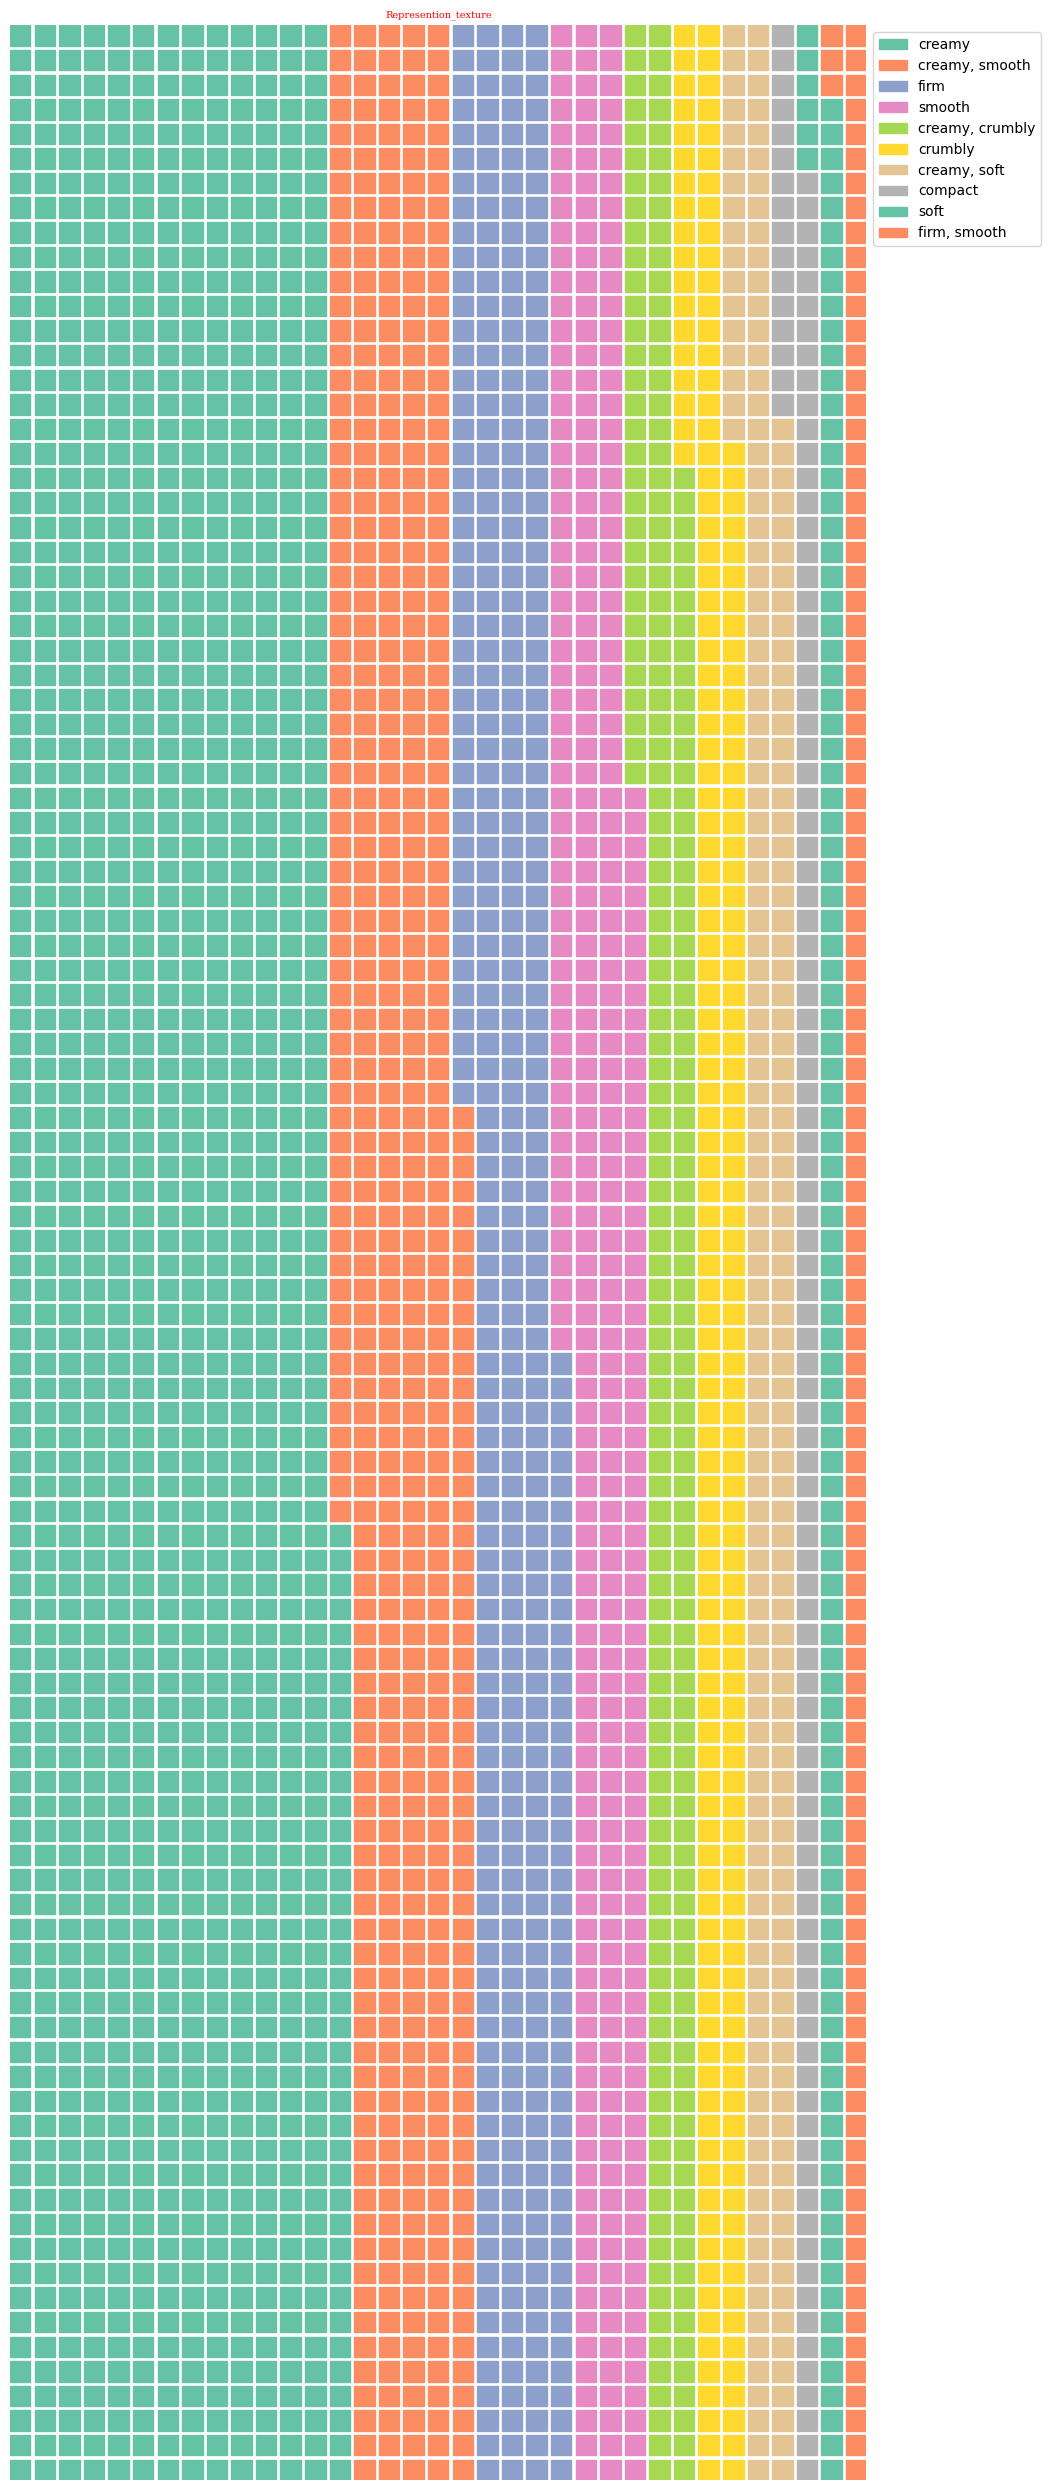

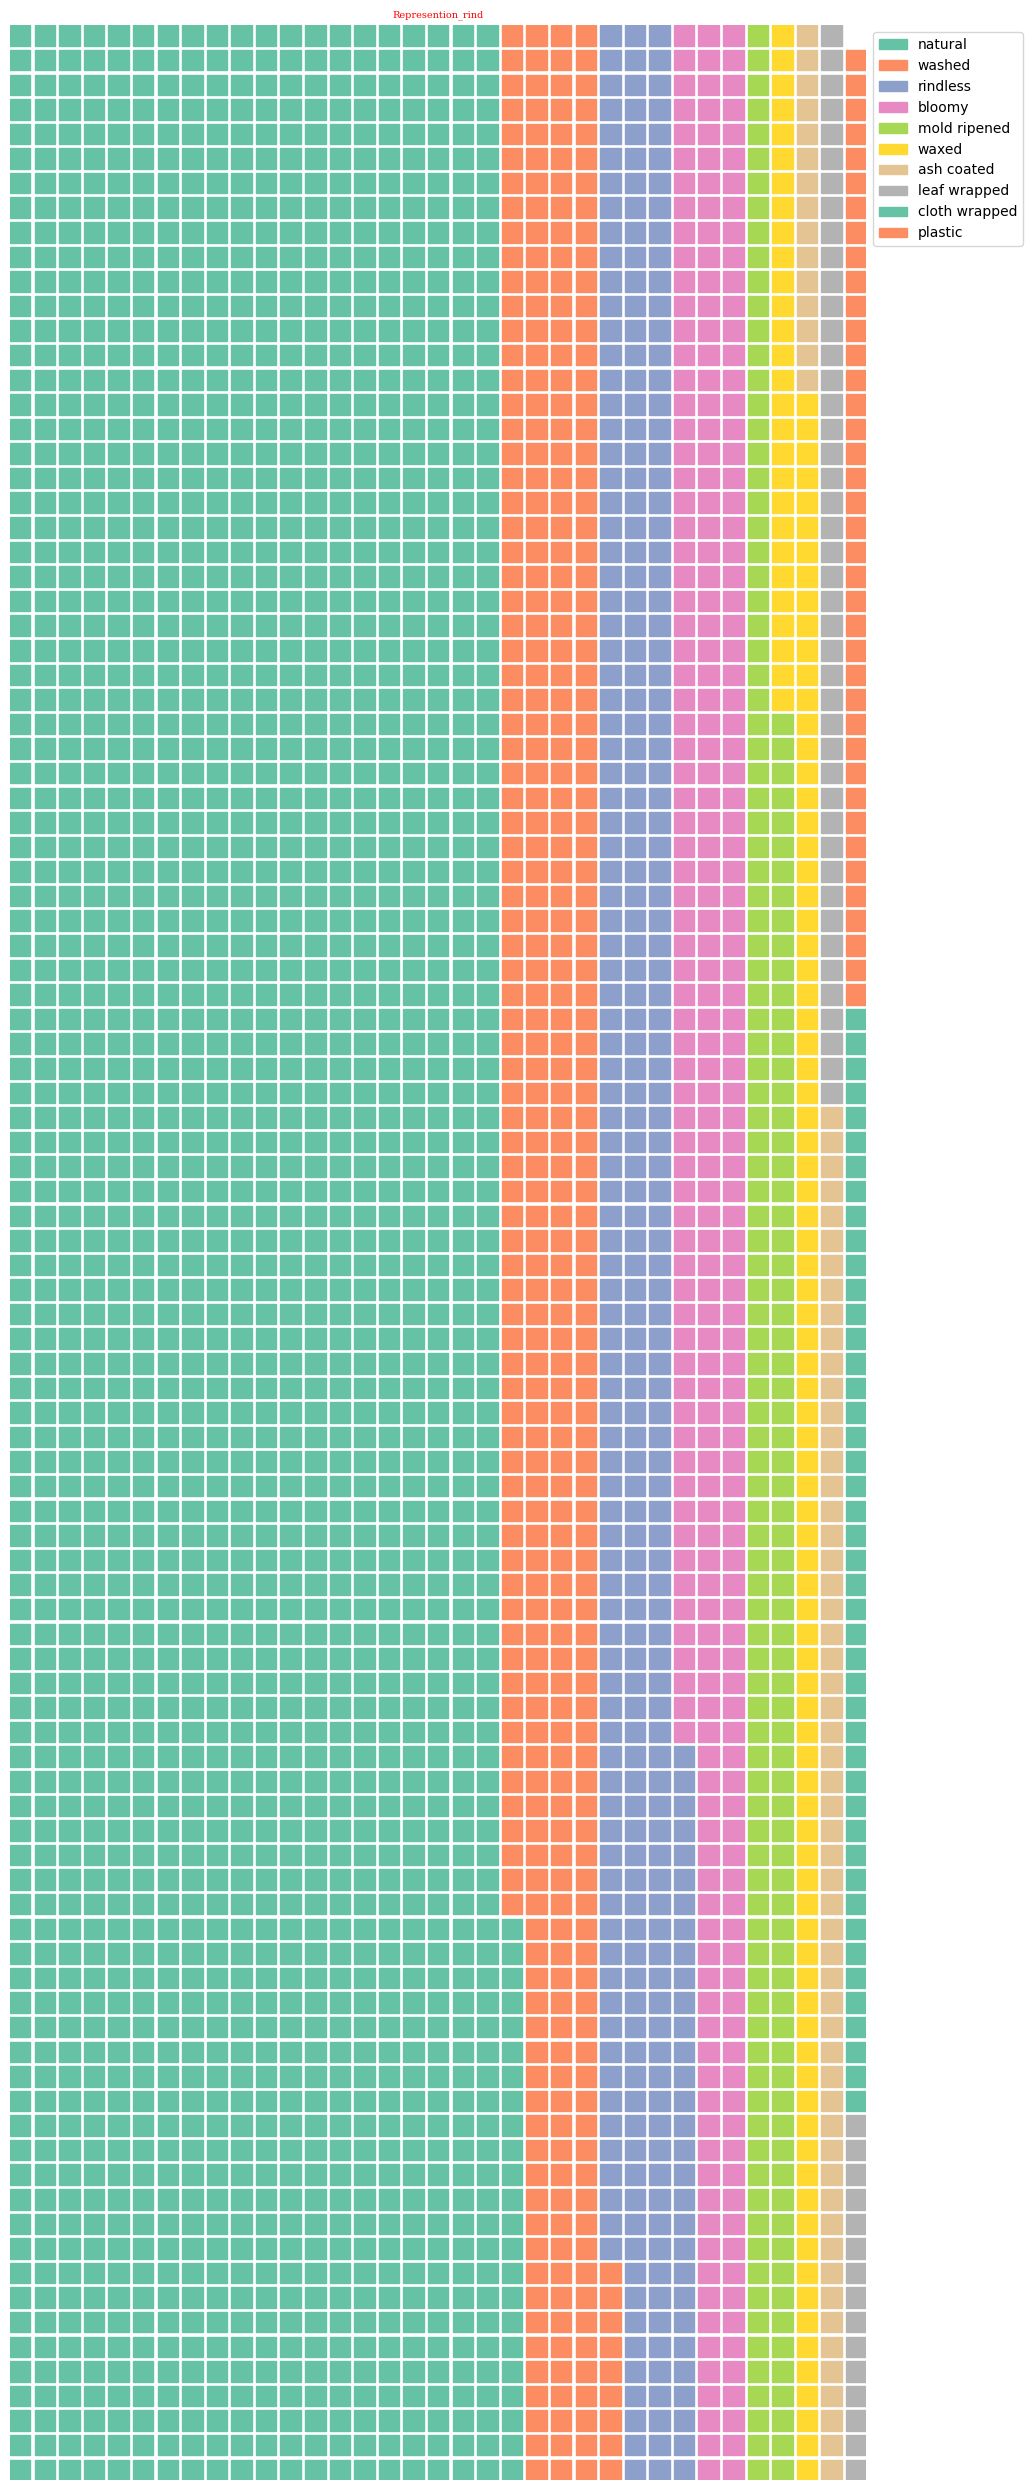

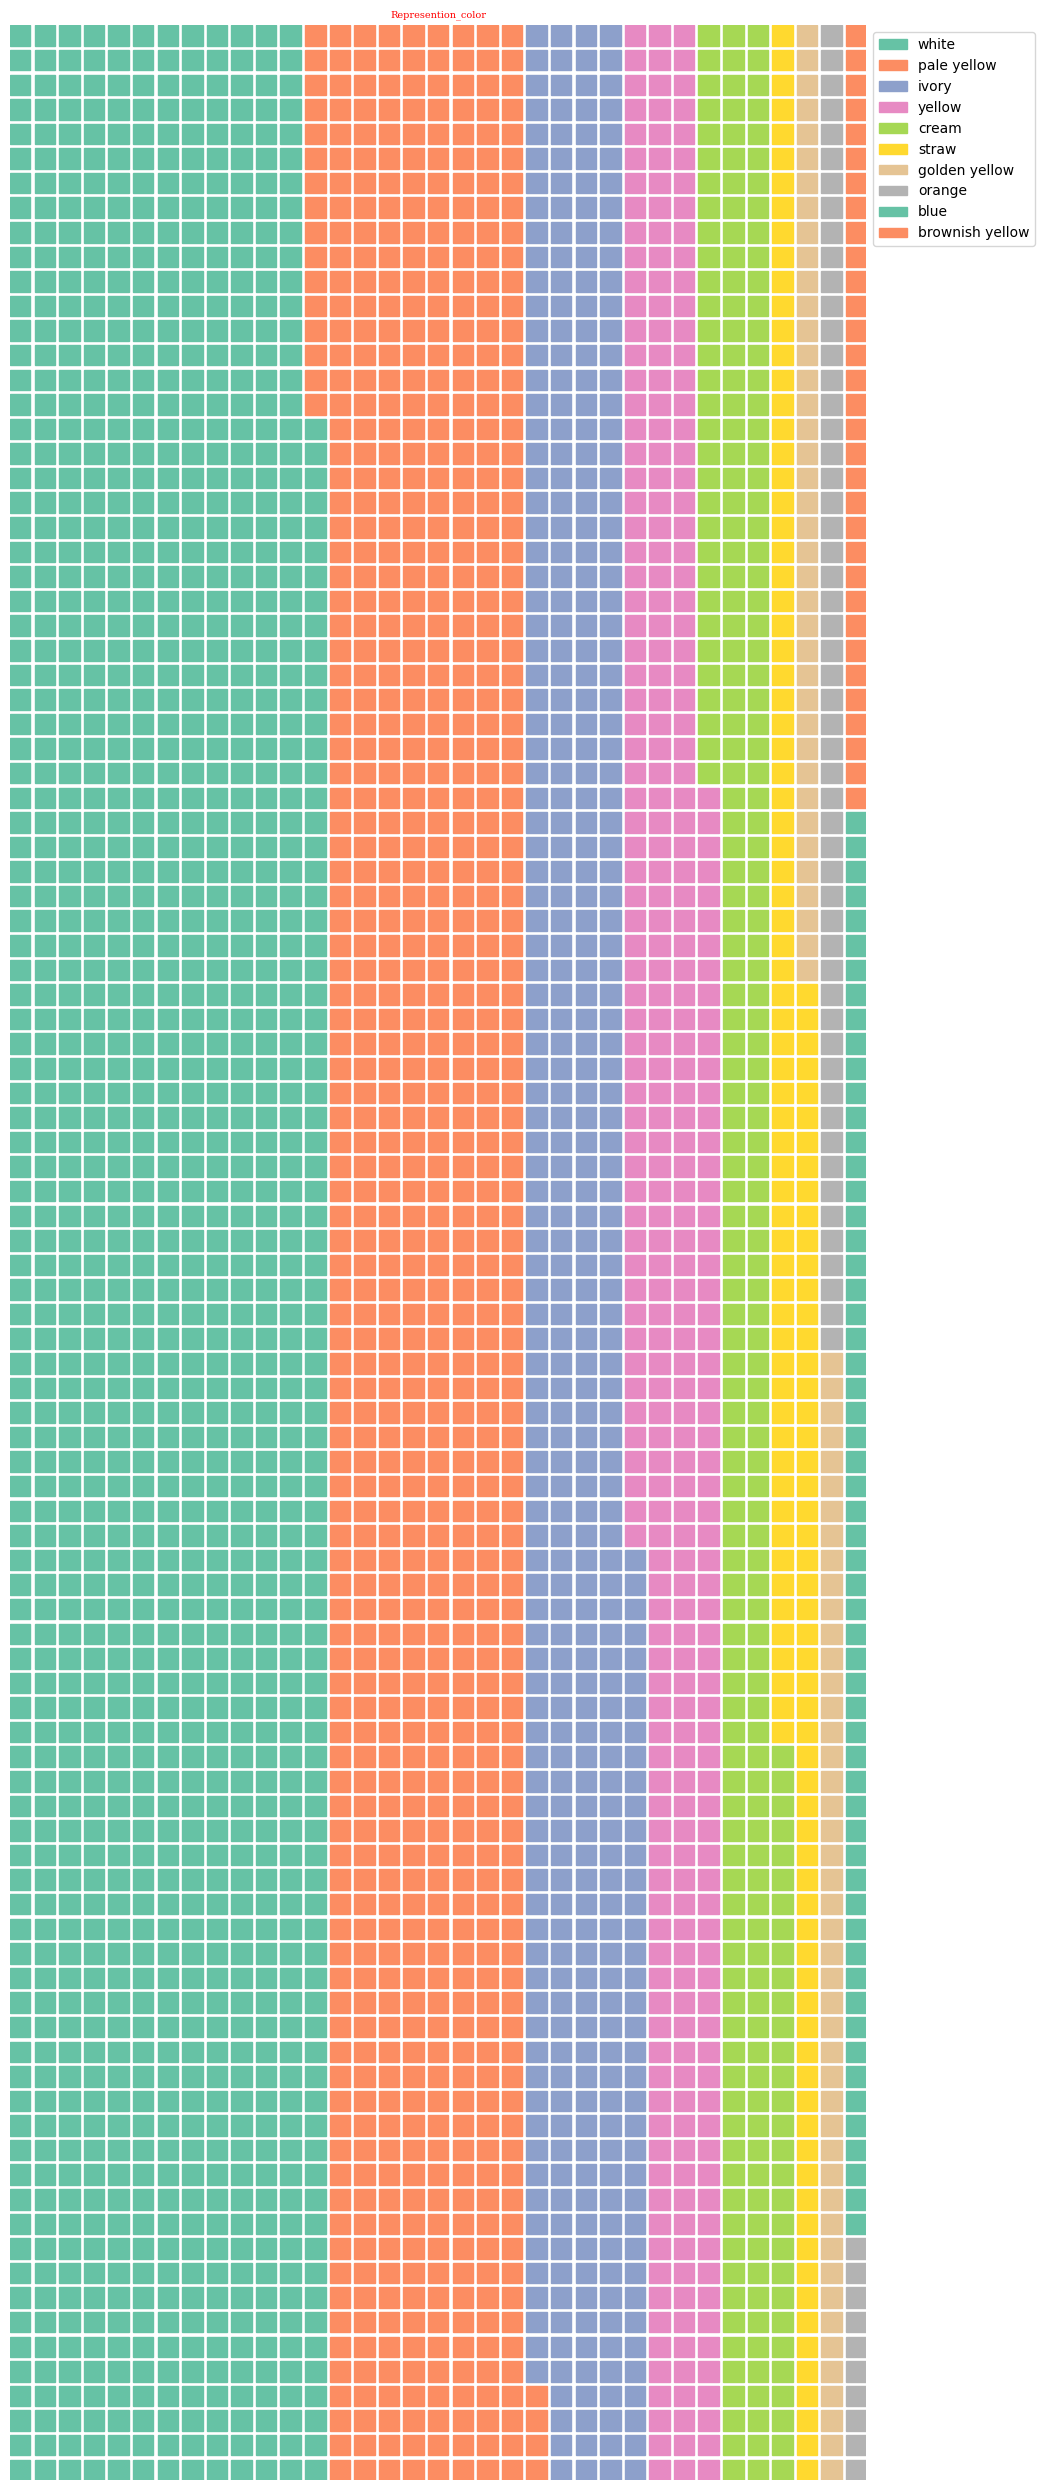

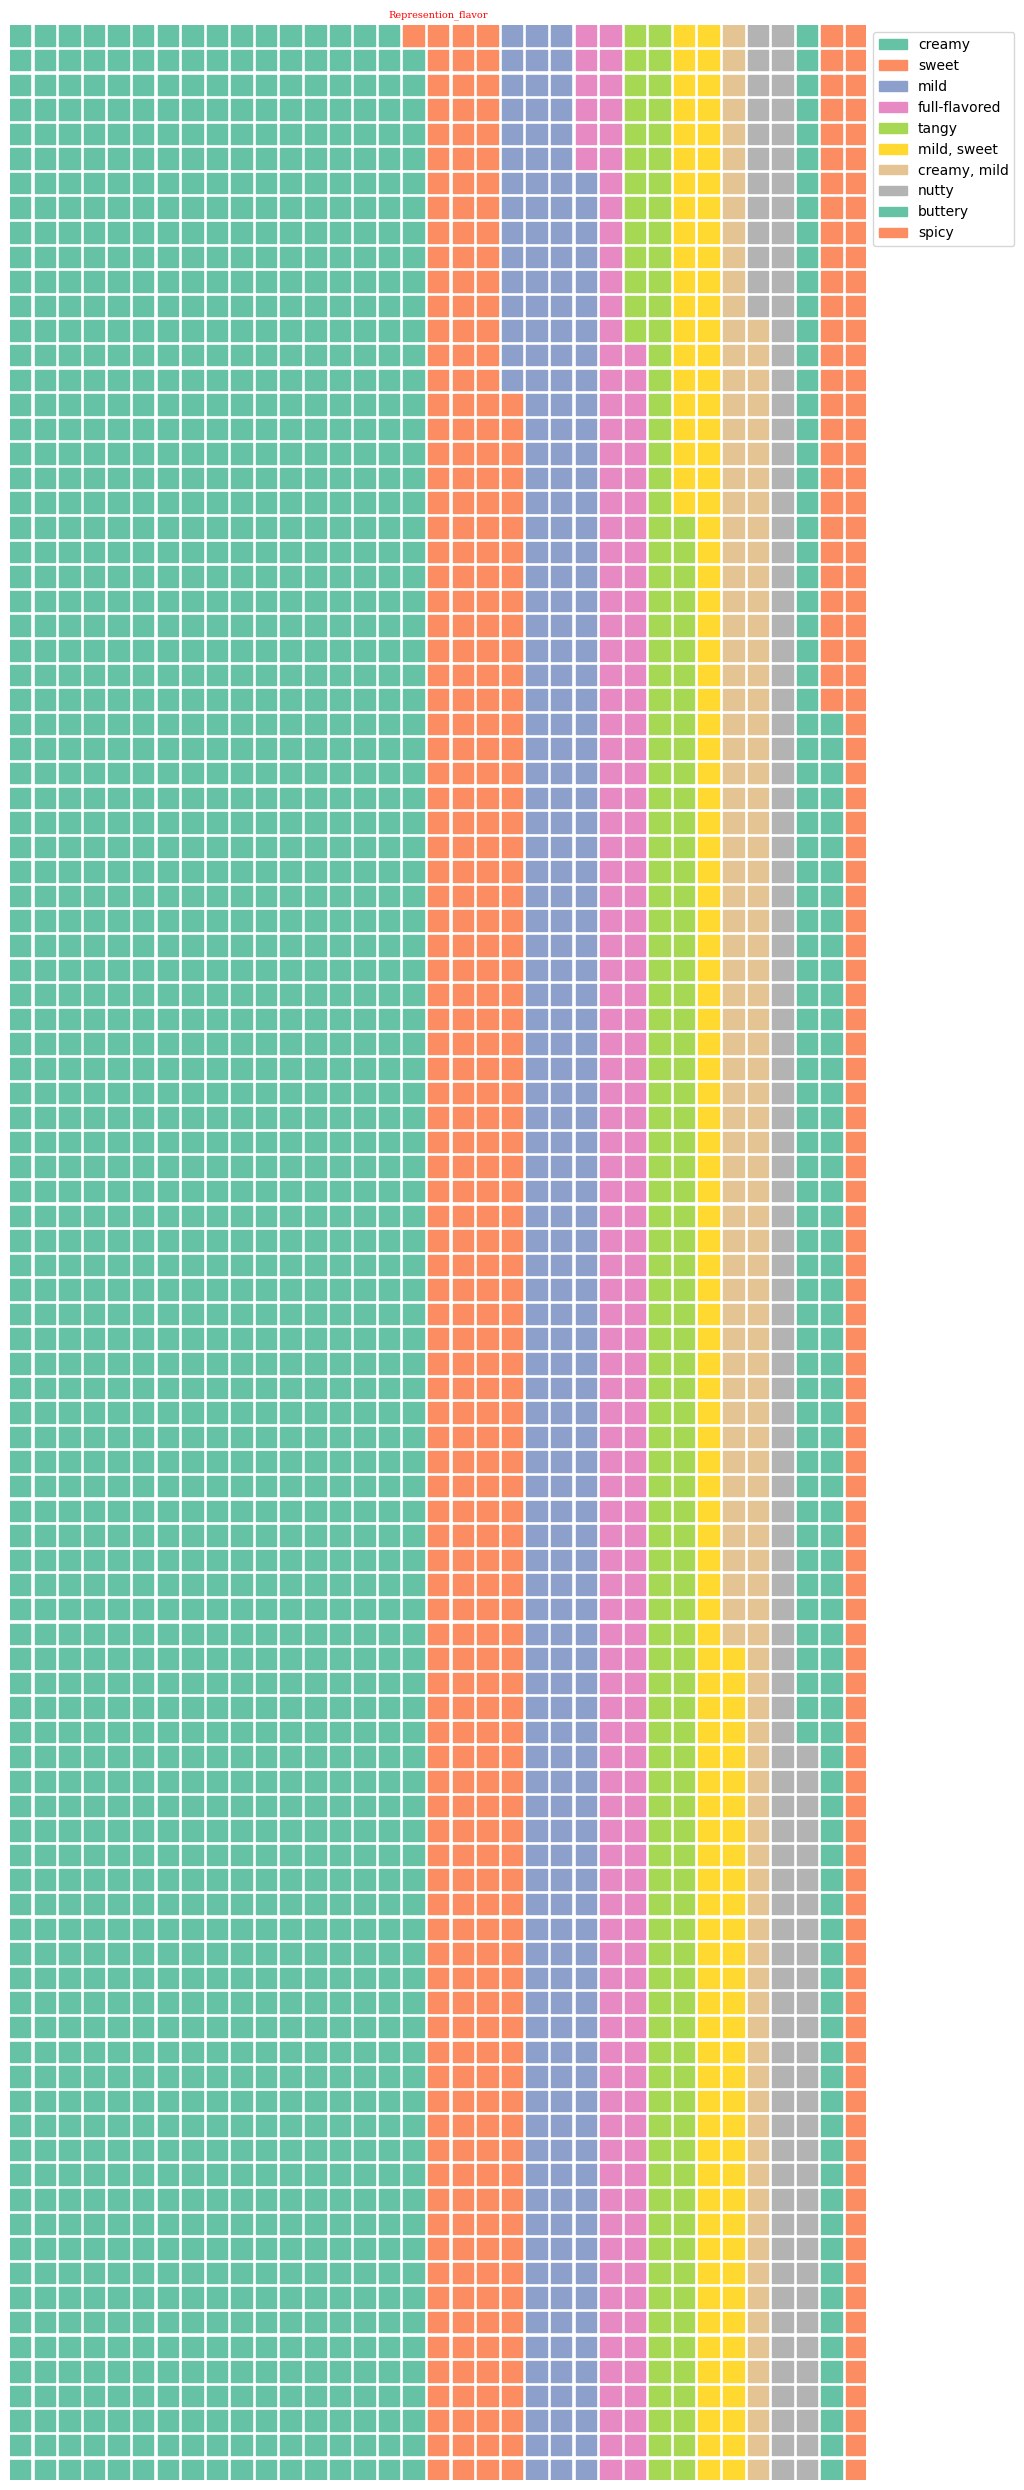

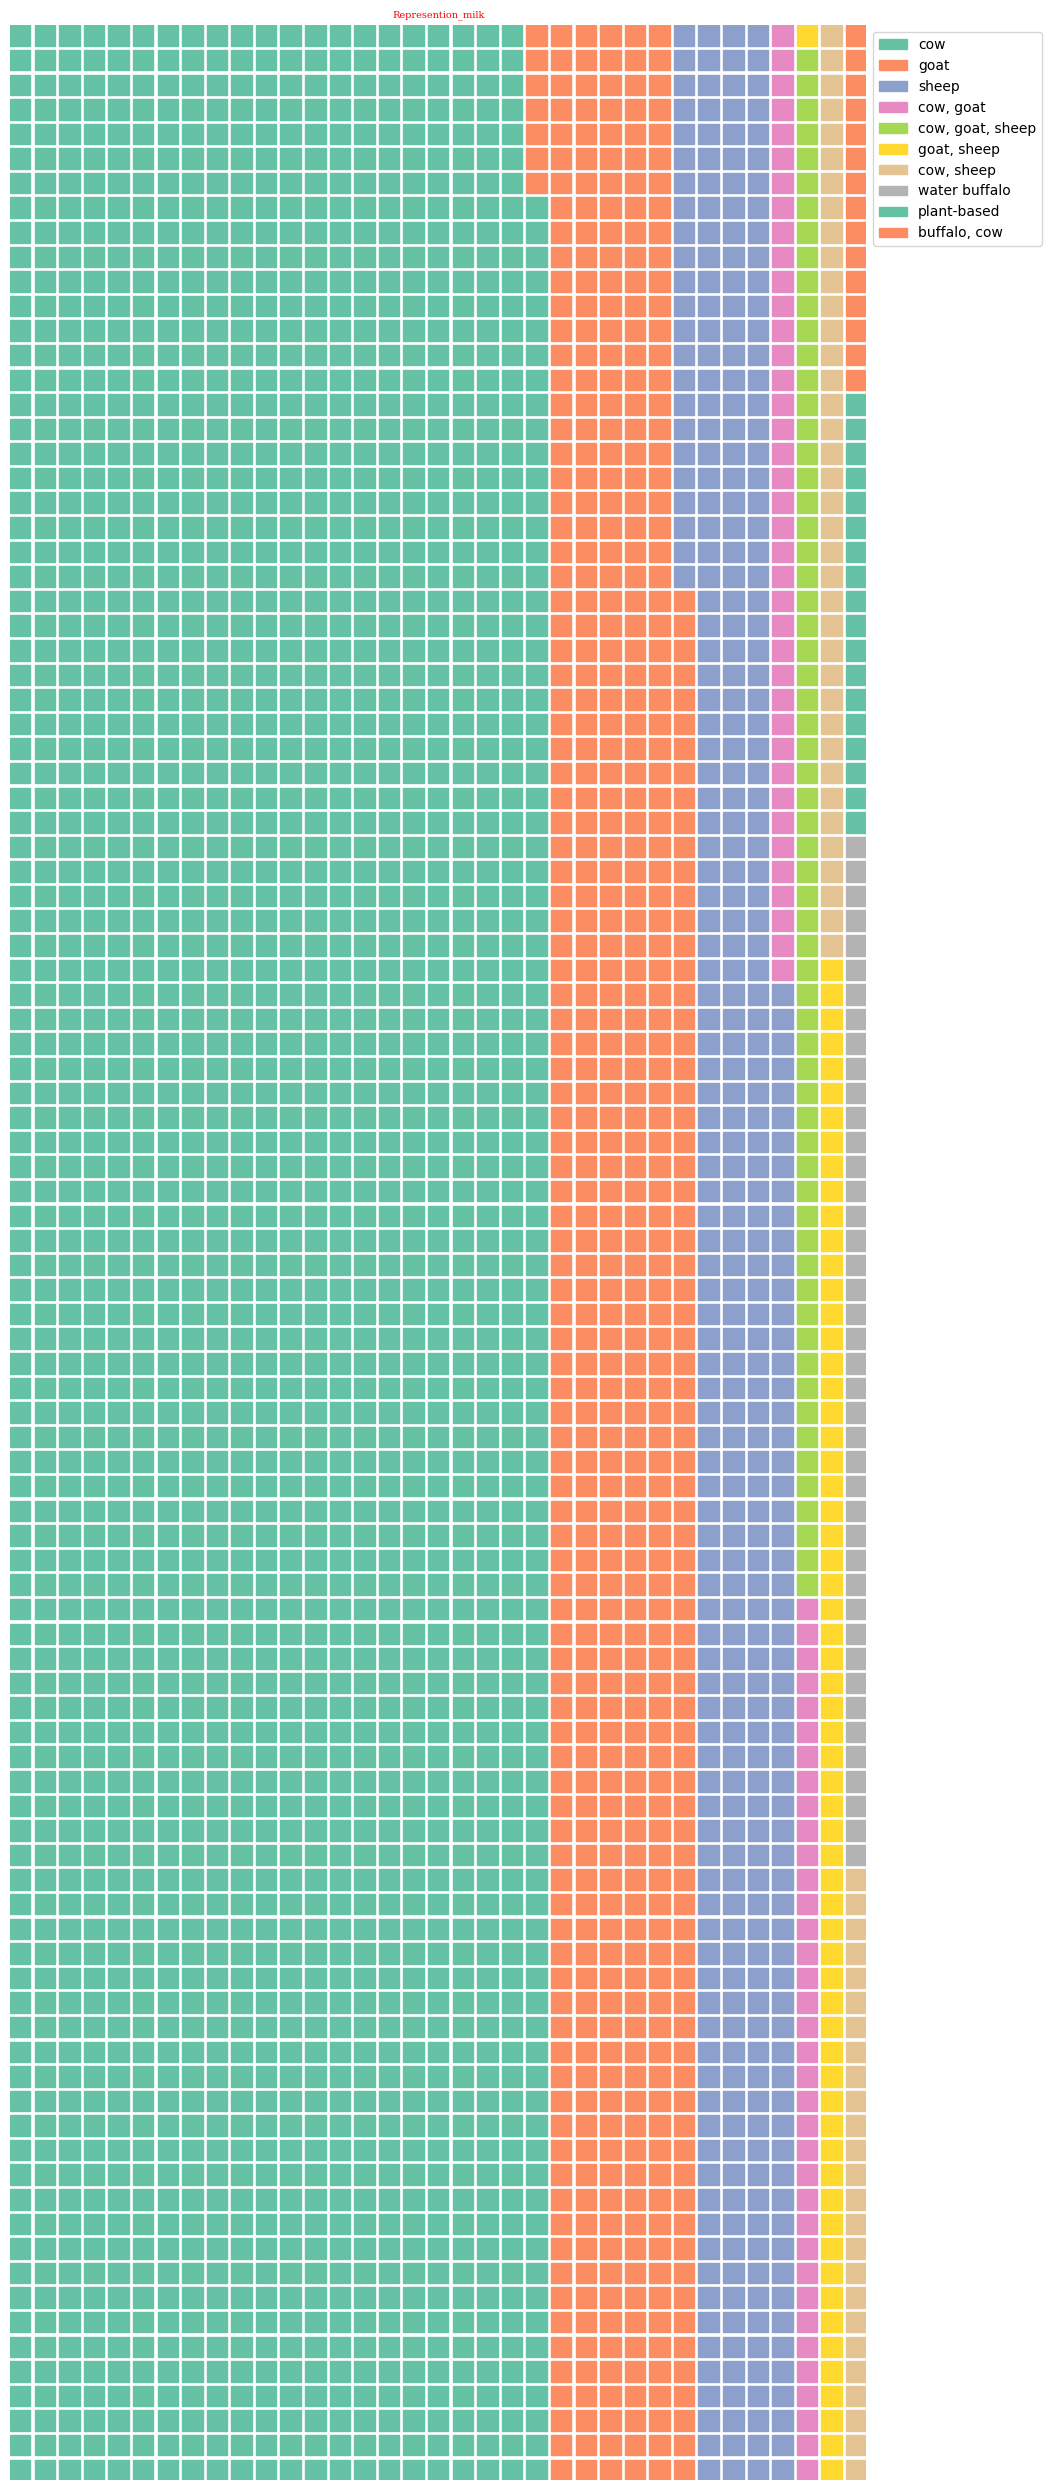

In [17]:
# Pywaffle for speific Features  :
# we can  see which item is control on other items in every feature from Waffle .

from pywaffle import Waffle

f1 = {"family": "serif", "size": 7, "color": "r"}

Features=["texture","rind","color","flavor","milk"]

for col in Features :
    f = data[col].value_counts()
    TOp_10_f= f.head(10)
    
    # Ensure that 'values' is a list of numerical values
    values = TOp_10_f.tolist()

    
    
    # Create the waffle chart
    fig = plt.figure(
       FigureClass=Waffle,
       rows=100,
       columns=35,
       values=values,
       legend={'labels': TOp_10_f.index.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
                )
    plt.title("Represention_" +col,fontdict=f1)

# Show the plot
plt.show()

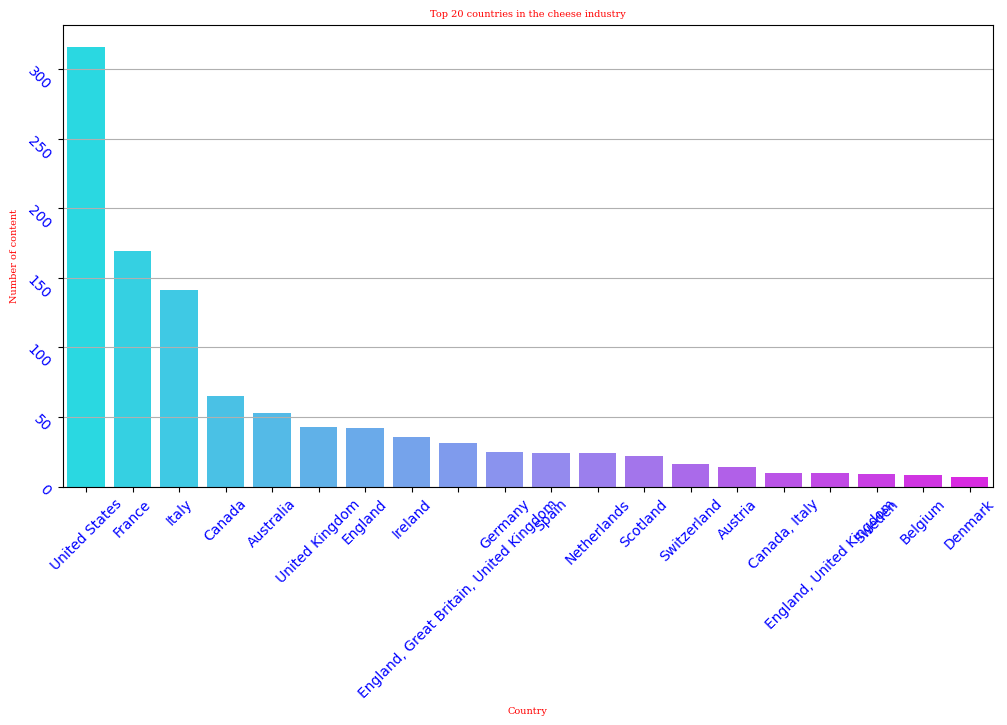

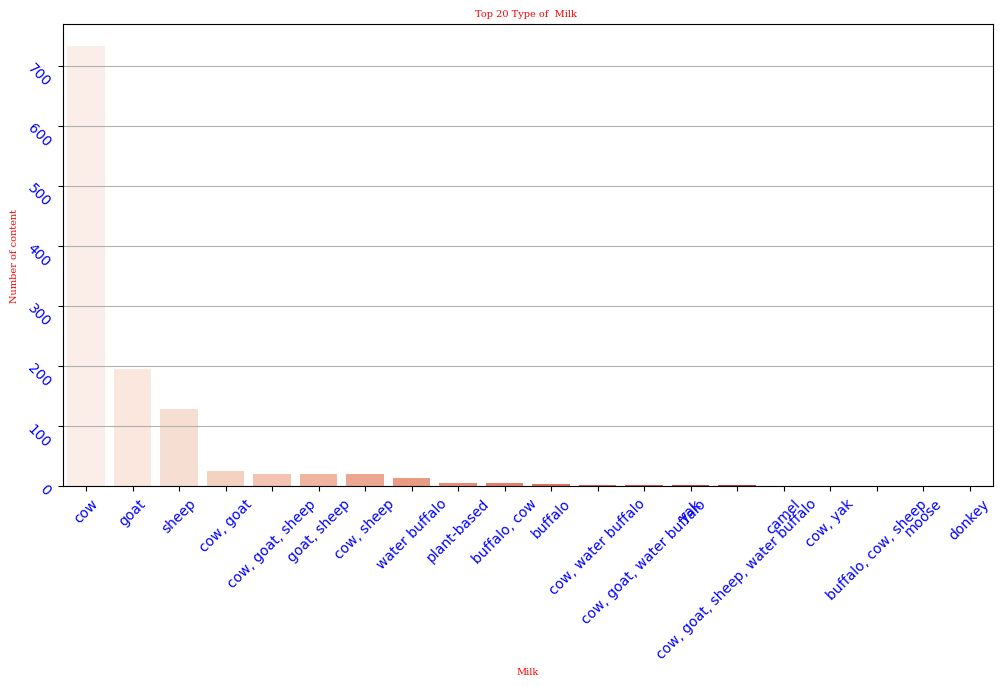

In [18]:
# plot the heighst 20 countries from cheese industry :

top_countries = data['country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,hue=top_countries.index,palette="cool")
plt.title('Top 20 countries in the cheese industry',fontdict=f1)
plt.xlabel('Country',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

#plot the top 20 county from the milk :

top_milk = data['milk'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_milk.index, y=top_milk.values,hue=top_milk.index,palette="Reds")
plt.title('Top 20 Type of  Milk ',fontdict=f1)
plt.xlabel('Milk',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

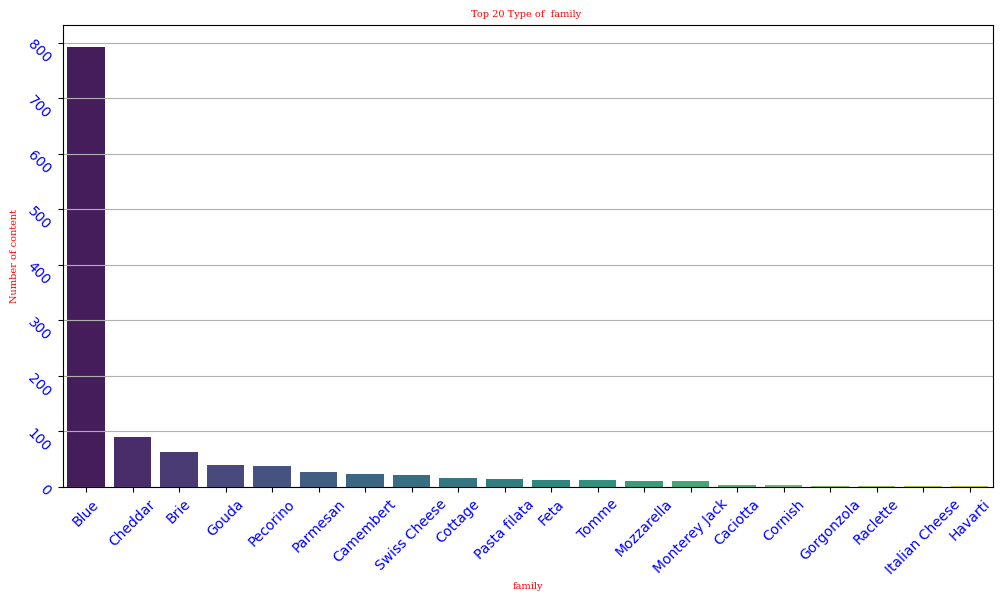

C:\Users\SatangLaptop\AppData\Local\Temp\ipykernel_33944\3932180550.py:19: UserWarning: 
The palette list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_types.index, y=top_types.values,hue=top_types.index,palette=color_palette)


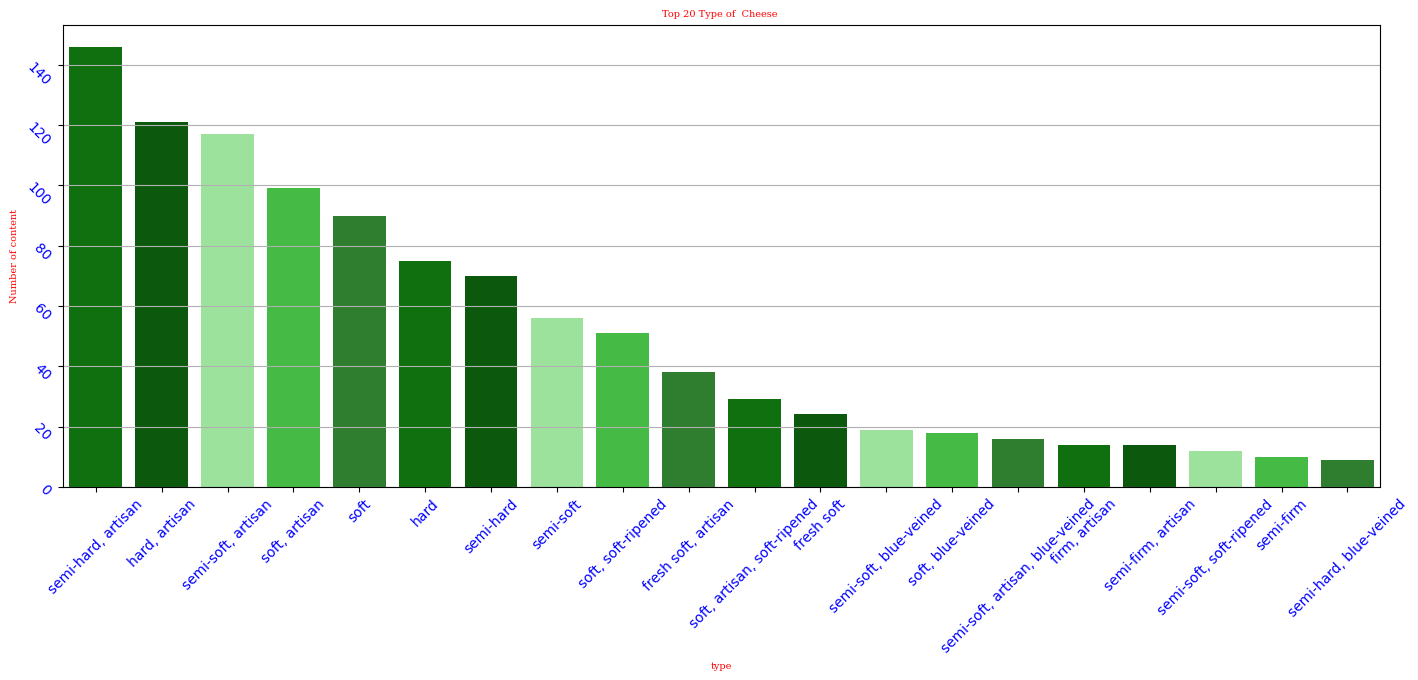

In [19]:
# plot the top 20 family : 

color_palette = ['green', 'darkgreen', 'lightgreen', 'limegreen', 'forestgreen']
top_family = data['family'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_family.index, y=top_family.values,hue=top_family.index,palette="viridis")
plt.title('Top 20 Type of  family ',fontdict=f1)
plt.xlabel('family',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

#plot the height 20 types of cheese :

top_types = data['type'].value_counts().head(20)
plt.figure(figsize=(17, 6))
sns.barplot(x=top_types.index, y=top_types.values,hue=top_types.index,palette=color_palette)
plt.title('Top 20 Type of  Cheese ',fontdict=f1)
plt.xlabel('type',fontdict=f1)
plt.ylabel('Number of content',fontdict=f1)
plt.grid(True, axis='y')
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

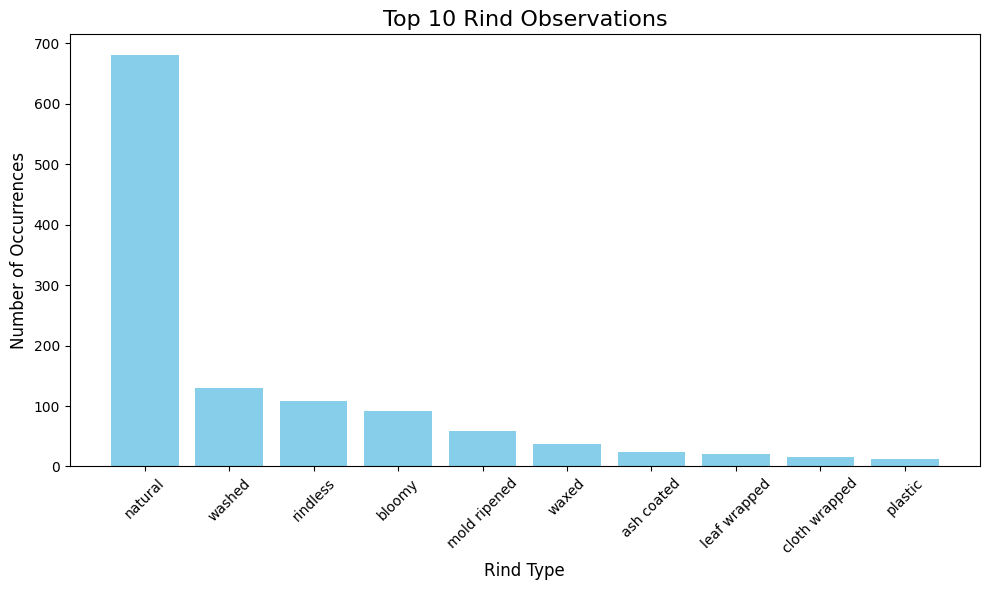

In [20]:
# ดึงข้อมูล Top 10 จากคอลัมน์ "rind"
top_10 = data["rind"].value_counts().head(10)

# สร้าง DataFrame ใหม่สำหรับกราฟ
top_10_df = top_10.reset_index()
top_10_df.columns = ['Rind', 'Count']  # เปลี่ยนชื่อคอลัมน์ให้เหมาะสม

# สร้างกราฟแท่งโดยใช้ Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['Rind'], top_10_df['Count'], color='skyblue')

# ปรับแต่งกราฟ
plt.title("Top 10 Rind Observations", fontsize=16)
plt.xlabel("Rind Type", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xticks(rotation=45)  # หมุนชื่อแกน X ให้อ่านง่ายขึ้น

# แสดงกราฟ
plt.tight_layout()
plt.show()

In [21]:
# แปลงคอลัมน์ fat_content เป็นตัวเลข โดยใช้ errors='coerce' เพื่อแปลงค่าที่ไม่สามารถแปลงเป็นตัวเลขให้เป็น NaN
data['fat_content'] = pd.to_numeric(data['fat_content'], errors='coerce')

# กรองเฉพาะข้อมูลที่ไม่เป็น NaN หลังการแปลง
data_cleaned = data.dropna(subset=['fat_content'])

# เลือกชีสที่มีค่าไขมันเฉลี่ยสูงสุด 10 ชีส
top_10 = data_cleaned.groupby("cheese")["fat_content"].mean().sort_values(ascending=False).head(10)

# แสดงผล top 10
print(top_10)

# สร้าง DataFrame สำหรับกราฟ
top_10_df = top_10.reset_index()

# สร้างกราฟ Pie Chart โดยใช้ Plotly
fig = px.pie(top_10_df, names='cheese', values='fat_content', color_discrete_sequence=color_palette)

fig.update_layout(
    title="Observation cheeses vs. fat_content",
    legend_title="Cheeses",
    width=800,
    height=600
)

# แสดงกราฟ
fig.show()

cheese
Mycella                   5060.0
Le Gruyère AOP            4953.0
Burgos                    4660.0
Amarelo de Beira Baixa    4560.0
Prastost                  4550.0
Milleens                  4550.0
Saaland Pfarr             4550.0
Brocciu                   4050.0
Alverca                   4050.0
Minas cheese              4050.0
Name: fat_content, dtype: float64


In [22]:
fig = px.histogram(data, x="texture", color="vegan")
fig.update_layout(
    bargap=0.2,
    title="Observation texture",
    legend_title="texture",
    width=800,  
    height=600  
)
fig.show()

In [23]:
fig = px.histogram(data, x="rind", color="vegan")
fig.update_layout(
    bargap=0.2,
    title="Observation rind",
    legend_title="rind",
    width=800,  
    height=600  
)
fig.show()

In [24]:
fig = px.histogram(data, x="color", color="vegan")
fig.update_layout(
    bargap=0.2,
    title="Observation color",
    legend_title="color",
    width=800,  
    height=600  
)
fig.show()

In [25]:
fig = px.histogram(data, x="flavor", color="vegan")
fig.update_layout(
    bargap=0.2,
    title="Observation flavor",
    legend_title="flavor",
    width=800,  
    height=600  
)
fig.show()

In [26]:
fig = px.histogram(data, x="aroma", color="vegan")
fig.update_layout(
    bargap=0.2,
    title="Observation aroma",
    legend_title="aroma",
    width=800,  
    height=600  
)
fig.show()

In [27]:
fig = px.histogram(data, x="vegetarian", color="vegan")
fig.update_layout(
    bargap=0.2,
    title="Observation vegetarian",
    legend_title="vegetarian",
    width=800,  
    height=600  
)
fig.show()

In [28]:
# convert Categorical into Numerical :
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])

In [29]:
data  

cheese  milk  country  region  family  type  fat_content  \
0          2     4       75     342       0    48           52   
1          3    18       36     238       0    40           52   
2          4     4       36     342       0    39           74   
3          5     4       36      54       0    51           52   
4          6     4       36     282       0    63           52   
...      ...   ...      ...     ...     ...   ...          ...   
1182    1180     4       74     184       0    44           52   
1183    1181    13        4     293       0     9           52   
1184    1182    18       30     310       0    21           52   
1185    1183     4       75     342       0    40           52   
1186    1184     4       80     342      19    24            3   

      calcium_content  texture  rind  color  flavor  aroma  vegetarian  vegan  \
0                  15       12    10     16     623     51           0      0   
1                  15      120     7     16      73    242           1      0   
2                  15      251    10      8     225      0           0      0   
3                  15      122    10     15      37     46           0      0   
4                  15      157    10     15     367    284           0      0   
...               ...      ...   ...    ...     ...    ...         ...    ...   
1182               15      193     9     11       0    303           0      0   
1183               15      100     1     15      17    138           1      0   
1184               15      293     7     16     608    126           1      0   
1185               15      278    11     15     514    281           0      0   
1186               15      264     9     11     532    303           1      0   

      synonyms  alt_spellings  producers  
0          224              0        167  
1            1              0        258  
2          224              0        258  
3          224              0        258  
4          224             94        258  
...        ...            ...        ...  
1182       224              0        258  
1183       224              0        312  
1184       254              0        258  
1185       224              0        258  
1186         8              0        297  

[1187 rows x 18 columns]

In [30]:
# selecting numerical features :
numerical_features = data.select_dtypes(include=['number'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

cheese      milk   country    region    family      type  fat_content  \
0    -1.724756 -0.679781  0.925972  0.947143 -0.525802  0.218707     0.200744   
1    -1.721837  1.956532 -0.636941  0.014840 -0.525802 -0.187244     0.200744   
2    -1.718919 -0.679781 -0.636941  0.947143 -0.525802 -0.237987     2.555739   
3    -1.716000 -0.679781 -0.636941 -1.634619 -0.525802  0.370939     0.200744   
4    -1.713082 -0.679781 -0.636941  0.409276 -0.525802  0.979865     0.200744   
...        ...       ...       ...       ...       ...       ...          ...   
1182  1.713082 -0.679781  0.885897 -0.469240 -0.525802  0.015732     0.200744   
1183  1.716000  1.014992 -1.919331  0.507885 -0.525802 -1.760303     0.200744   
1184  1.718919  1.956532 -0.877389  0.660281 -0.525802 -1.151377     0.200744   
1185  1.721837 -0.679781  0.925972  0.947143 -0.525802 -0.187244     0.200744   
1186  1.724756 -0.679781  1.126345  0.947143  3.106174 -0.999145    -5.044473   

      calcium_content   texture      rind     color    flavor     aroma  \
0            0.064293 -1.857918  1.338654  1.075877  1.549410 -1.582017   
1            0.064293 -0.527108  0.015237  1.075877 -1.464915  0.270608   
2            0.064293  1.087115  1.338654 -0.876450 -0.631866 -2.076697   
3            0.064293 -0.502464  1.338654  0.831836 -1.662217 -1.630515   
4            0.064293 -0.071183  1.338654  0.831836  0.146378  0.677992   
...               ...       ...       ...       ...       ...       ...   
1182         0.064293  0.372420  0.897515 -0.144327 -1.864999  0.862285   
1183         0.064293 -0.773555 -2.631595  0.831836 -1.771829 -0.738151   
1184         0.064293  1.604652  0.015237  1.075877  1.467201 -0.854546   
1185         0.064293  1.419817  1.779793  0.831836  0.952025  0.648893   
1186         0.064293  1.247305  0.897515 -0.144327  1.050676  0.862285   

      vegetarian     vegan  synonyms  alt_spellings  producers  
0      -0.662411 -0.071277  0.359159      -0.271292  -0.426598  
1       1.509638 -0.071277 -3.788378      -0.271292   0.675290  
2      -0.662411 -0.071277  0.359159      -0.271292   0.675290  
3      -0.662411 -0.071277  0.359159      -0.271292   0.675290  
4      -0.662411 -0.071277  0.359159       4.871453   0.675290  
...          ...       ...       ...            ...        ...  
1182   -0.662411 -0.071277  0.359159      -0.271292   0.675290  
1183    1.509638 -0.071277  0.359159      -0.271292   1.329157  
1184    1.509638 -0.071277  0.917124      -0.271292   0.675290  
1185   -0.662411 -0.071277  0.359159      -0.271292   0.675290  
1186    1.509638 -0.071277 -3.658187      -0.271292   1.147528  

[1187 rows x 18 columns]

In [31]:
# split the data int train & test :

x=data.drop(columns="vegetarian",axis=1)
y=data["vegetarian"]

In [32]:
# train split of the Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (830, 17)
x_test shape :  (357, 17)
y_train shape :  (830,)
y_test shape :  (357,)


In [33]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [34]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)

In [35]:
transform=Var_Selector(data)
transform.fit_transform(data)

cheese  milk  country  region  family  type  fat_content  \
0          2     4       75     342       0    48           52   
1          3    18       36     238       0    40           52   
2          4     4       36     342       0    39           74   
3          5     4       36      54       0    51           52   
4          6     4       36     282       0    63           52   
...      ...   ...      ...     ...     ...   ...          ...   
1182    1180     4       74     184       0    44           52   
1183    1181    13        4     293       0     9           52   
1184    1182    18       30     310       0    21           52   
1185    1183     4       75     342       0    40           52   
1186    1184     4       80     342      19    24            3   

      calcium_content  texture  rind  color  flavor  aroma  vegetarian  \
0                  15       12    10     16     623     51           0   
1                  15      120     7     16      73    242           1   
2                  15      251    10      8     225      0           0   
3                  15      122    10     15      37     46           0   
4                  15      157    10     15     367    284           0   
...               ...      ...   ...    ...     ...    ...         ...   
1182               15      193     9     11       0    303           0   
1183               15      100     1     15      17    138           1   
1184               15      293     7     16     608    126           1   
1185               15      278    11     15     514    281           0   
1186               15      264     9     11     532    303           1   

      synonyms  alt_spellings  producers  
0          224              0        167  
1            1              0        258  
2          224              0        258  
3          224              0        258  
4          224             94        258  
...        ...            ...        ...  
1182       224              0        258  
1183       224              0        312  
1184       254              0        258  
1185       224              0        258  
1186         8              0        297  

[1187 rows x 17 columns]

In [36]:
# Check if there are aduplicated values in the data & drop it if found :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  0
Number of duplicates of cleaning it ----->>>  0


In [37]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()
corr

cheese      milk   country    region    family      type  \
cheese           1.000000  0.022532  0.064450  0.034171  0.152735 -0.065532   
milk             0.022532  1.000000  0.050211 -0.096543  0.055785 -0.040094   
country          0.064450  0.050211  1.000000 -0.019685  0.065580 -0.105715   
region           0.034171 -0.096543 -0.019685  1.000000  0.027110 -0.041453   
family           0.152735  0.055785  0.065580  0.027110  1.000000 -0.167808   
type            -0.065532 -0.040094 -0.105715 -0.041453 -0.167808  1.000000   
fat_content      0.034970  0.012970  0.104852 -0.021473 -0.024412 -0.001735   
calcium_content  0.009341 -0.029945  0.055766  0.016138 -0.022817 -0.003886   
texture         -0.030513  0.036052  0.000285 -0.037875  0.102641 -0.039243   
rind            -0.012056 -0.070612  0.022216  0.041818  0.058949 -0.245099   
color            0.010271  0.106615 -0.044998  0.061574  0.055495 -0.072156   
flavor           0.002635  0.011800  0.008316  0.012939  0.054767 -0.058531   
aroma            0.026251 -0.081716  0.028809  0.076792 -0.005955  0.029523   
vegetarian       0.050182  0.002481  0.138627 -0.071368  0.003593 -0.126446   
vegan           -0.011787  0.126034  0.071713  0.067510 -0.037478  0.032468   
synonyms         0.174888  0.050254  0.066332 -0.018052 -0.003519 -0.030848   
alt_spellings    0.086809 -0.044292 -0.085470 -0.053259 -0.012407  0.011808   
producers        0.162383 -0.003297 -0.055882  0.113031 -0.005260  0.028848   

                 fat_content  calcium_content   texture      rind     color  \
cheese              0.034970         0.009341 -0.030513 -0.012056  0.010271   
milk                0.012970        -0.029945  0.036052 -0.070612  0.106615   
country             0.104852         0.055766  0.000285  0.022216 -0.044998   
region             -0.021473         0.016138 -0.037875  0.041818  0.061574   
family             -0.024412        -0.022817  0.102641  0.058949  0.055495   
type               -0.001735        -0.003886 -0.039243 -0.245099 -0.072156   
fat_content         1.000000         0.064765  0.014794  0.016275  0.000451   
calcium_content     0.064765         1.000000 -0.018304  0.030421  0.012268   
texture             0.014794        -0.018304  1.000000  0.084935  0.071011   
rind                0.016275         0.030421  0.084935  1.000000  0.030678   
color               0.000451         0.012268  0.071011  0.030678  1.000000   
flavor              0.017605        -0.025637  0.126980  0.045352  0.056559   
aroma               0.006138         0.021184  0.048729  0.052663 -0.024295   
vegetarian          0.025046         0.002689 -0.043680 -0.009280 -0.049162   
vegan               0.014308         0.004583  0.009565 -0.035598 -0.071168   
synonyms            0.045399         0.032142 -0.025688  0.006548 -0.044818   
alt_spellings       0.004387         0.006262  0.035497  0.058564  0.019335   
producers           0.054316         0.023285  0.017989  0.028236  0.030615   

                   flavor     aroma  vegetarian     vegan  synonyms  \
cheese           0.002635  0.026251    0.050182 -0.011787  0.174888   
milk             0.011800 -0.081716    0.002481  0.126034  0.050254   
country          0.008316  0.028809    0.138627  0.071713  0.066332   
region           0.012939  0.076792   -0.071368  0.067510 -0.018052   
family           0.054767 -0.005955    0.003593 -0.037478 -0.003519   
type            -0.058531  0.029523   -0.126446  0.032468 -0.030848   
fat_content      0.017605  0.006138    0.025046  0.014308  0.045399   
calcium_content -0.025637  0.021184    0.002689  0.004583  0.032142   
texture          0.126980  0.048729   -0.043680  0.009565 -0.025688   
rind             0.045352  0.052663   -0.009280 -0.035598  0.006548   
color            0.056559 -0.024295   -0.049162 -0.071168 -0.044818   
flavor           1.000000  0.081692   -0.013805 -0.026026 -0.066302   
aroma            0.081692  1.000000   -0.030681 -0.047082  0.005470   
vegetarian      -0.01

In [38]:
# Calculate Spearman Correlation:
sperman=data.select_dtypes("number").corr(method="spearman")
sperman

cheese      milk   country    region    family      type  \
cheese           1.000000  0.009200  0.078378  0.034613  0.106956 -0.064495   
milk             0.009200  1.000000  0.043135 -0.106671 -0.054910 -0.017593   
country          0.078378  0.043135  1.000000  0.004817  0.046781 -0.099459   
region           0.034613 -0.106671  0.004817  1.000000 -0.010606 -0.055232   
family           0.106956 -0.054910  0.046781 -0.010606  1.000000 -0.112936   
type            -0.064495 -0.017593 -0.099459 -0.055232 -0.112936  1.000000   
fat_content      0.013218  0.003495  0.051104 -0.025086 -0.048834  0.004163   
calcium_content  0.036909 -0.046988  0.041658  0.011528 -0.013234 -0.023969   
texture         -0.032345  0.032652  0.001990 -0.049831  0.061148 -0.034766   
rind            -0.026072 -0.109110 -0.008264  0.055001 -0.029583 -0.225353   
color           -0.021465  0.068406 -0.064346  0.077121  0.064518 -0.092221   
flavor           0.002217  0.002171 -0.004606  0.029375  0.030766 -0.050797   
aroma            0.014553 -0.083630  0.008931  0.108351 -0.001276  0.004774   
vegetarian       0.050182 -0.004200  0.141289 -0.072058  0.023604 -0.113879   
vegan           -0.011787  0.106555  0.052003  0.082292 -0.049024  0.025414   
synonyms         0.115492  0.045280  0.059730 -0.002433 -0.043624 -0.021278   
alt_spellings    0.032112 -0.049842 -0.098083 -0.038432 -0.006620  0.003378   
producers        0.135768 -0.010568 -0.053063  0.130447 -0.078389  0.000661   

                 fat_content  calcium_content   texture      rind     color  \
cheese              0.013218         0.036909 -0.032345 -0.026072 -0.021465   
milk                0.003495        -0.046988  0.032652 -0.109110  0.068406   
country             0.051104         0.041658  0.001990 -0.008264 -0.064346   
region             -0.025086         0.011528 -0.049831  0.055001  0.077121   
family             -0.048834        -0.013234  0.061148 -0.029583  0.064518   
type                0.004163        -0.023969 -0.034766 -0.225353 -0.092221   
fat_content         1.000000        -0.015372  0.022115  0.016793  0.040375   
calcium_content    -0.015372         1.000000 -0.027071  0.034374  0.030367   
texture             0.022115        -0.027071  1.000000  0.086089  0.073550   
rind                0.016793         0.034374  0.086089  1.000000  0.048135   
color               0.040375         0.030367  0.073550  0.048135  1.000000   
flavor              0.002668        -0.017348  0.108818  0.031076  0.063565   
aroma              -0.024668         0.034934  0.044155  0.056290 -0.009074   
vegetarian          0.040429        -0.011216 -0.031659  0.006774 -0.036383   
vegan               0.006087         0.003049  0.011603 -0.068150 -0.044805   
synonyms            0.011336         0.006719 -0.023017  0.008484 -0.043199   
alt_spellings      -0.022610         0.015360  0.077151  0.086614  0.020274   
producers           0.113180         0.027518  0.014985 -0.005431  0.025275   

                   flavor     aroma  vegetarian     vegan  synonyms  \
cheese           0.002217  0.014553    0.050182 -0.011787  0.115492   
milk             0.002171 -0.083630   -0.004200  0.106555  0.045280   
country         -0.004606  0.008931    0.141289  0.052003  0.059730   
region           0.029375  0.108351   -0.072058  0.082292 -0.002433   
family           0.030766 -0.001276    0.023604 -0.049024 -0.043624   
type            -0.050797  0.004774   -0.113879  0.025414 -0.021278   
fat_content      0.002668 -0.024668    0.040429  0.006087  0.011336   
calcium_content -0.017348  0.034934   -0.011216  0.003049  0.006719   
texture          0.108818  0.044155   -0.031659  0.011603 -0.023017   
rind             0.031076  0.056290    0.006774 -0.068150  0.008484   
color            0.063565 -0.009074   -0.036383 -0.044805 -0.043199   
flavor           1.000000  0.106033   -0.012353 -0.024216 -0.056370   
aroma            0.106033  1.000000   -0.043519 -0.054545  0.003607   
vegetarian      -0.01

In [39]:
# Calculate pearson Correlation:
pearson=data.select_dtypes("number").corr(method="pearson")
pearson

cheese      milk   country    region    family      type  \
cheese           1.000000  0.022532  0.064450  0.034171  0.152735 -0.065532   
milk             0.022532  1.000000  0.050211 -0.096543  0.055785 -0.040094   
country          0.064450  0.050211  1.000000 -0.019685  0.065580 -0.105715   
region           0.034171 -0.096543 -0.019685  1.000000  0.027110 -0.041453   
family           0.152735  0.055785  0.065580  0.027110  1.000000 -0.167808   
type            -0.065532 -0.040094 -0.105715 -0.041453 -0.167808  1.000000   
fat_content      0.034970  0.012970  0.104852 -0.021473 -0.024412 -0.001735   
calcium_content  0.009341 -0.029945  0.055766  0.016138 -0.022817 -0.003886   
texture         -0.030513  0.036052  0.000285 -0.037875  0.102641 -0.039243   
rind            -0.012056 -0.070612  0.022216  0.041818  0.058949 -0.245099   
color            0.010271  0.106615 -0.044998  0.061574  0.055495 -0.072156   
flavor           0.002635  0.011800  0.008316  0.012939  0.054767 -0.058531   
aroma            0.026251 -0.081716  0.028809  0.076792 -0.005955  0.029523   
vegetarian       0.050182  0.002481  0.138627 -0.071368  0.003593 -0.126446   
vegan           -0.011787  0.126034  0.071713  0.067510 -0.037478  0.032468   
synonyms         0.174888  0.050254  0.066332 -0.018052 -0.003519 -0.030848   
alt_spellings    0.086809 -0.044292 -0.085470 -0.053259 -0.012407  0.011808   
producers        0.162383 -0.003297 -0.055882  0.113031 -0.005260  0.028848   

                 fat_content  calcium_content   texture      rind     color  \
cheese              0.034970         0.009341 -0.030513 -0.012056  0.010271   
milk                0.012970        -0.029945  0.036052 -0.070612  0.106615   
country             0.104852         0.055766  0.000285  0.022216 -0.044998   
region             -0.021473         0.016138 -0.037875  0.041818  0.061574   
family             -0.024412        -0.022817  0.102641  0.058949  0.055495   
type               -0.001735        -0.003886 -0.039243 -0.245099 -0.072156   
fat_content         1.000000         0.064765  0.014794  0.016275  0.000451   
calcium_content     0.064765         1.000000 -0.018304  0.030421  0.012268   
texture             0.014794        -0.018304  1.000000  0.084935  0.071011   
rind                0.016275         0.030421  0.084935  1.000000  0.030678   
color               0.000451         0.012268  0.071011  0.030678  1.000000   
flavor              0.017605        -0.025637  0.126980  0.045352  0.056559   
aroma               0.006138         0.021184  0.048729  0.052663 -0.024295   
vegetarian          0.025046         0.002689 -0.043680 -0.009280 -0.049162   
vegan               0.014308         0.004583  0.009565 -0.035598 -0.071168   
synonyms            0.045399         0.032142 -0.025688  0.006548 -0.044818   
alt_spellings       0.004387         0.006262  0.035497  0.058564  0.019335   
producers           0.054316         0.023285  0.017989  0.028236  0.030615   

                   flavor     aroma  vegetarian     vegan  synonyms  \
cheese           0.002635  0.026251    0.050182 -0.011787  0.174888   
milk             0.011800 -0.081716    0.002481  0.126034  0.050254   
country          0.008316  0.028809    0.138627  0.071713  0.066332   
region           0.012939  0.076792   -0.071368  0.067510 -0.018052   
family           0.054767 -0.005955    0.003593 -0.037478 -0.003519   
type            -0.058531  0.029523   -0.126446  0.032468 -0.030848   
fat_content      0.017605  0.006138    0.025046  0.014308  0.045399   
calcium_content -0.025637  0.021184    0.002689  0.004583  0.032142   
texture          0.126980  0.048729   -0.043680  0.009565 -0.025688   
rind             0.045352  0.052663   -0.009280 -0.035598  0.006548   
color            0.056559 -0.024295   -0.049162 -0.071168 -0.044818   
flavor           1.000000  0.081692   -0.013805 -0.026026 -0.066302   
aroma            0.081692  1.000000   -0.030681 -0.047082  0.005470   
vegetarian      -0.01

In [40]:
# Calculate Kendall Correlation:
kendall=data.select_dtypes("number").corr(method="kendall")
kendall

cheese      milk   country    region    family      type  \
cheese           1.000000  0.007716  0.052968  0.023463  0.082419 -0.044831   
milk             0.007716  1.000000  0.035235 -0.084166 -0.051121 -0.013961   
country          0.052968  0.035235  1.000000  0.001557  0.033848 -0.074341   
region           0.023463 -0.084166  0.001557  1.000000 -0.008540 -0.040474   
family           0.082419 -0.051121  0.033848 -0.008540  1.000000 -0.082502   
type            -0.044831 -0.013961 -0.074341 -0.040474 -0.082502  1.000000   
fat_content      0.010401  0.003240  0.041810 -0.020541 -0.043620  0.003472   
calcium_content  0.030097 -0.043718  0.035623  0.009788 -0.012156 -0.020142   
texture         -0.021933  0.024830  0.000702 -0.035537  0.048230 -0.019294   
rind            -0.020026 -0.092452 -0.005335  0.043411 -0.025098 -0.172552   
color           -0.015416  0.055053 -0.048912  0.058692  0.053474 -0.067884   
flavor           0.001523  0.001880 -0.003470  0.022041  0.023638 -0.033927   
aroma            0.011018 -0.066754  0.006340  0.077484 -0.000727  0.004961   
vegetarian       0.040991 -0.003926  0.121288 -0.061459  0.021935 -0.095796   
vegan           -0.009628  0.099619  0.044642  0.070187 -0.045557  0.021379   
synonyms         0.095084  0.039799  0.048450 -0.002430 -0.038078 -0.016950   
alt_spellings    0.027524 -0.045853 -0.082444 -0.031981 -0.005867  0.002745   
producers        0.104152 -0.008908 -0.041111  0.094063 -0.060721  0.000405   

                 fat_content  calcium_content   texture      rind     color  \
cheese              0.010401         0.030097 -0.021933 -0.020026 -0.015416   
milk                0.003240        -0.043718  0.024830 -0.092452  0.055053   
country             0.041810         0.035623  0.000702 -0.005335 -0.048912   
region             -0.020541         0.009788 -0.035537  0.043411  0.058692   
family             -0.043620        -0.012156  0.048230 -0.025098  0.053474   
type                0.003472        -0.020142 -0.019294 -0.172552 -0.067884   
fat_content         1.000000        -0.014862  0.017963  0.015149  0.034819   
calcium_content    -0.014862         1.000000 -0.022508  0.031402  0.026966   
texture             0.017963        -0.022508  1.000000  0.066584  0.055027   
rind                0.015149         0.031402  0.066584  1.000000  0.038239   
color               0.034819         0.026966  0.055027  0.038239  1.000000   
flavor              0.002678        -0.014136  0.074941  0.023589  0.046517   
aroma              -0.020284         0.029195  0.030528  0.043071 -0.006811   
vegetarian          0.038827        -0.011164 -0.026419  0.006215 -0.032396   
vegan               0.005846         0.003035  0.009682 -0.062527 -0.039895   
synonyms            0.010208         0.006233 -0.017866  0.007607 -0.036540   
alt_spellings      -0.021125         0.014871  0.062634  0.077664  0.017550   
producers           0.092773         0.023478  0.010446 -0.003370  0.019201   

                   flavor     aroma  vegetarian     vegan  synonyms  \
cheese           0.001523  0.011018    0.040991 -0.009628  0.095084   
milk             0.001880 -0.066754   -0.003926  0.099619  0.039799   
country         -0.003470  0.006340    0.121288  0.044642  0.048450   
region           0.022041  0.077484   -0.061459  0.070187 -0.002430   
family           0.023638 -0.000727    0.021935 -0.045557 -0.038078   
type            -0.033927  0.004961   -0.095796  0.021379 -0.016950   
fat_content      0.002678 -0.020284    0.038827  0.005846  0.010208   
calcium_content -0.014136  0.029195   -0.011164  0.003035  0.006233   
texture          0.074941  0.030528   -0.026419  0.009682 -0.017866   
rind             0.023589  0.043071    0.006215 -0.062527  0.007607   
color            0.046517 -0.006811   -0.032396 -0.039895 -0.036540   
flavor           1.000000  0.073846   -0.010159 -0.019916 -0.043216   
aroma            0.073846  1.000000   -0.036667 -0.045957  0.003098   
vegetarian      -0.01

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

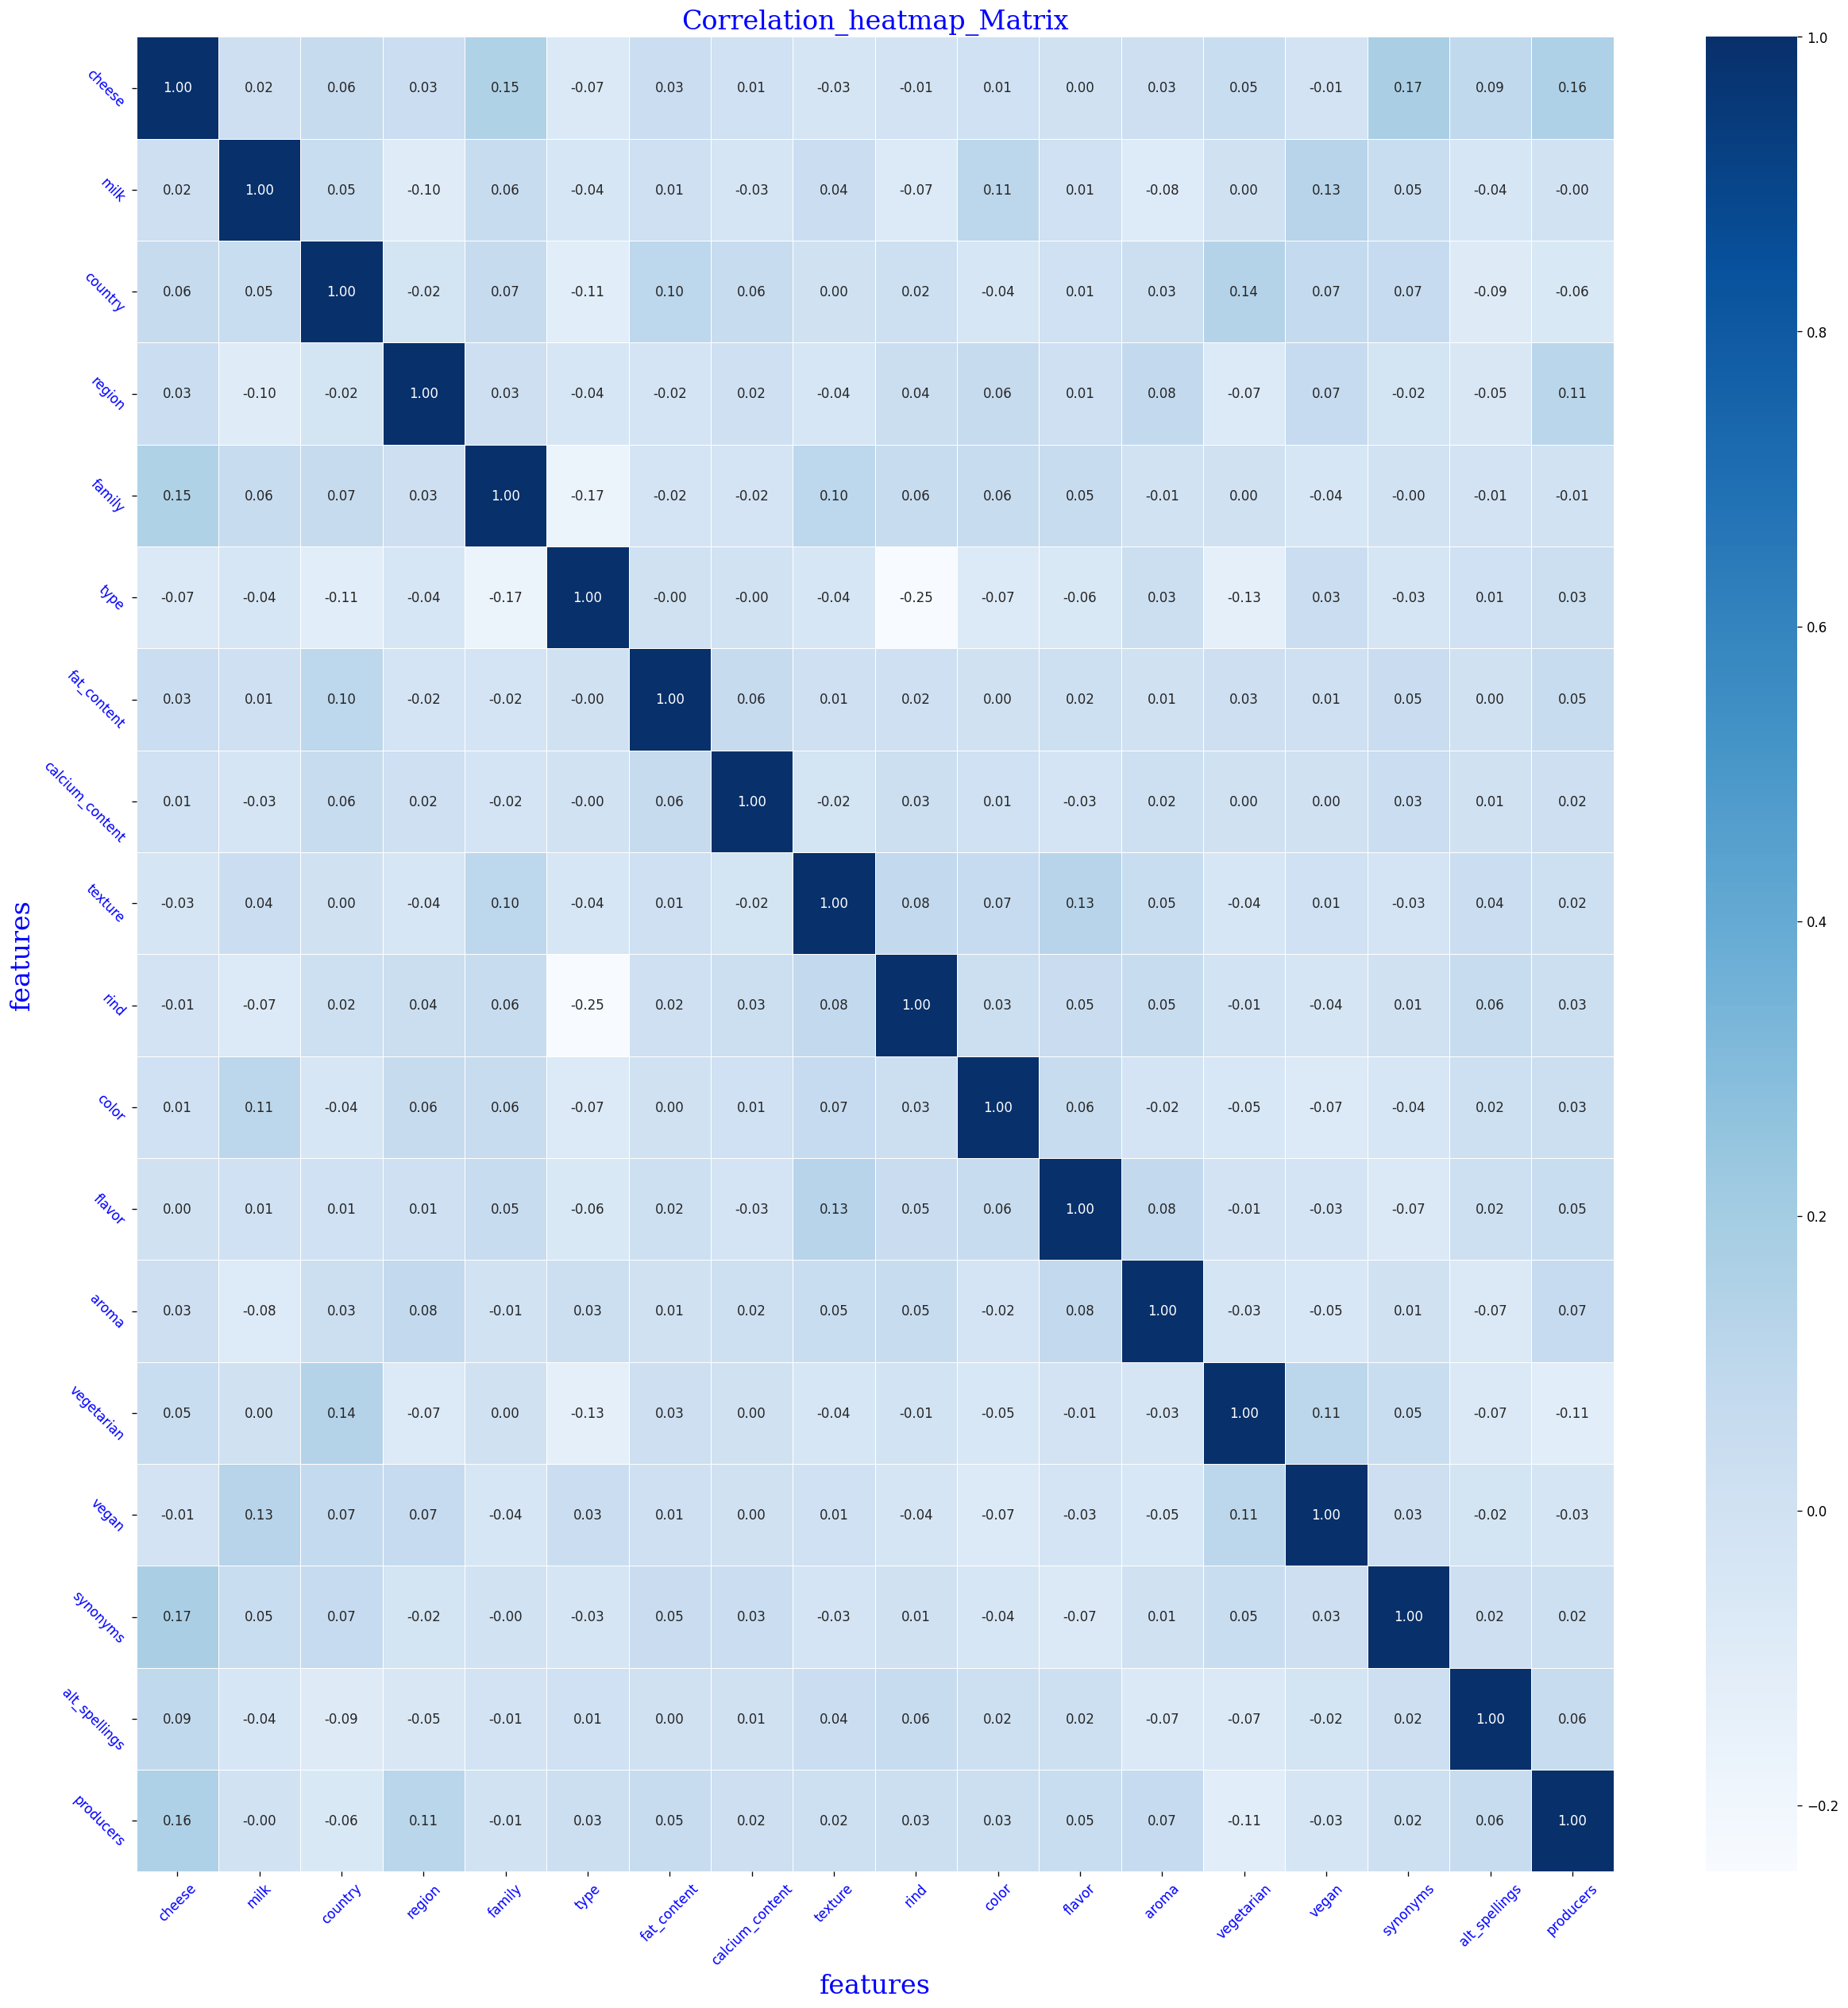

In [41]:
# plot the heatmap:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)

### Explaination Correlation Heatmap
กราฟ Heatmap ที่ถูกพล็อตออกมานั้นมีความหมายดังนี้
- ค่า 1  แสดงถึงความสัมพันธ์เชิงบวกที่สมบูรณ์แบบระหว่างสองตัวแปร เช่น ตัวแปรเดียวกัน (ตัวเองกับตัวเอง)
- ค่า 0  แสดงถึงการไม่มีความสัมพันธ์เชิงเส้นระหว่างสองตัวแปร
- ค่า -1 แสดงถึงความสัมพันธ์เชิงลบที่สมบูรณ์แบบ

ซึ่งนั้นหมายความว่า ค่าใดก็ตามที่มีความสัมพันธ์ระหว่างตัวแปรเป็นค่าเชิงบวก ค่าเหล่านั้นอาจส่งผลกับโมเดลอย่างนีนัยยะสำคัญได้
แต่จากที่เห็นได้จากชุดข้อมูล ค่าที่มีความสัมพันธ์เชิงบวกส่วนใหญ่แล้วมีค่าน้อยมากอย่างมากที่สุดคือ 0.14 

ดังนั้นเราอาจจะต้องมาดูข้อมูลในมุมมองอื่น

In [42]:
# found many feature contain the outliers  :
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"There outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in cheese feature
Q1 of cheese --->>> 296.5 
 Q3 of cheese ---->>> 889.5 
 iqr--->>593.0
 low_limit--->>>-593.0 
  upper_limit--->>> 1779.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in milk feature
Q1 of milk --->>> 4.0 
 Q3 of milk ---->>> 13.0 
 iqr--->>9.0
 low_limit--->>>-9.5 
  upper_limit--->>> 26.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in country feature
Q1 of country --->>> 36.0 
 Q3 of country ---->>> 80.0 
 iqr--->>44.0
 low_limit--->>>-30.0 
  upper_limit--->>> 146.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in region feature
Q1 of region --->>> 135.5 
 Q3 of region ---->>> 342.0 
 iqr--->>206.5
 low_limit--->>>-174.25 
  upper_limit--->>> 651.75 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
There outlier in this feature family
Q1 of famil

C:\Users\SatangLaptop\AppData\Local\Temp\ipykernel_33944\2693220712.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



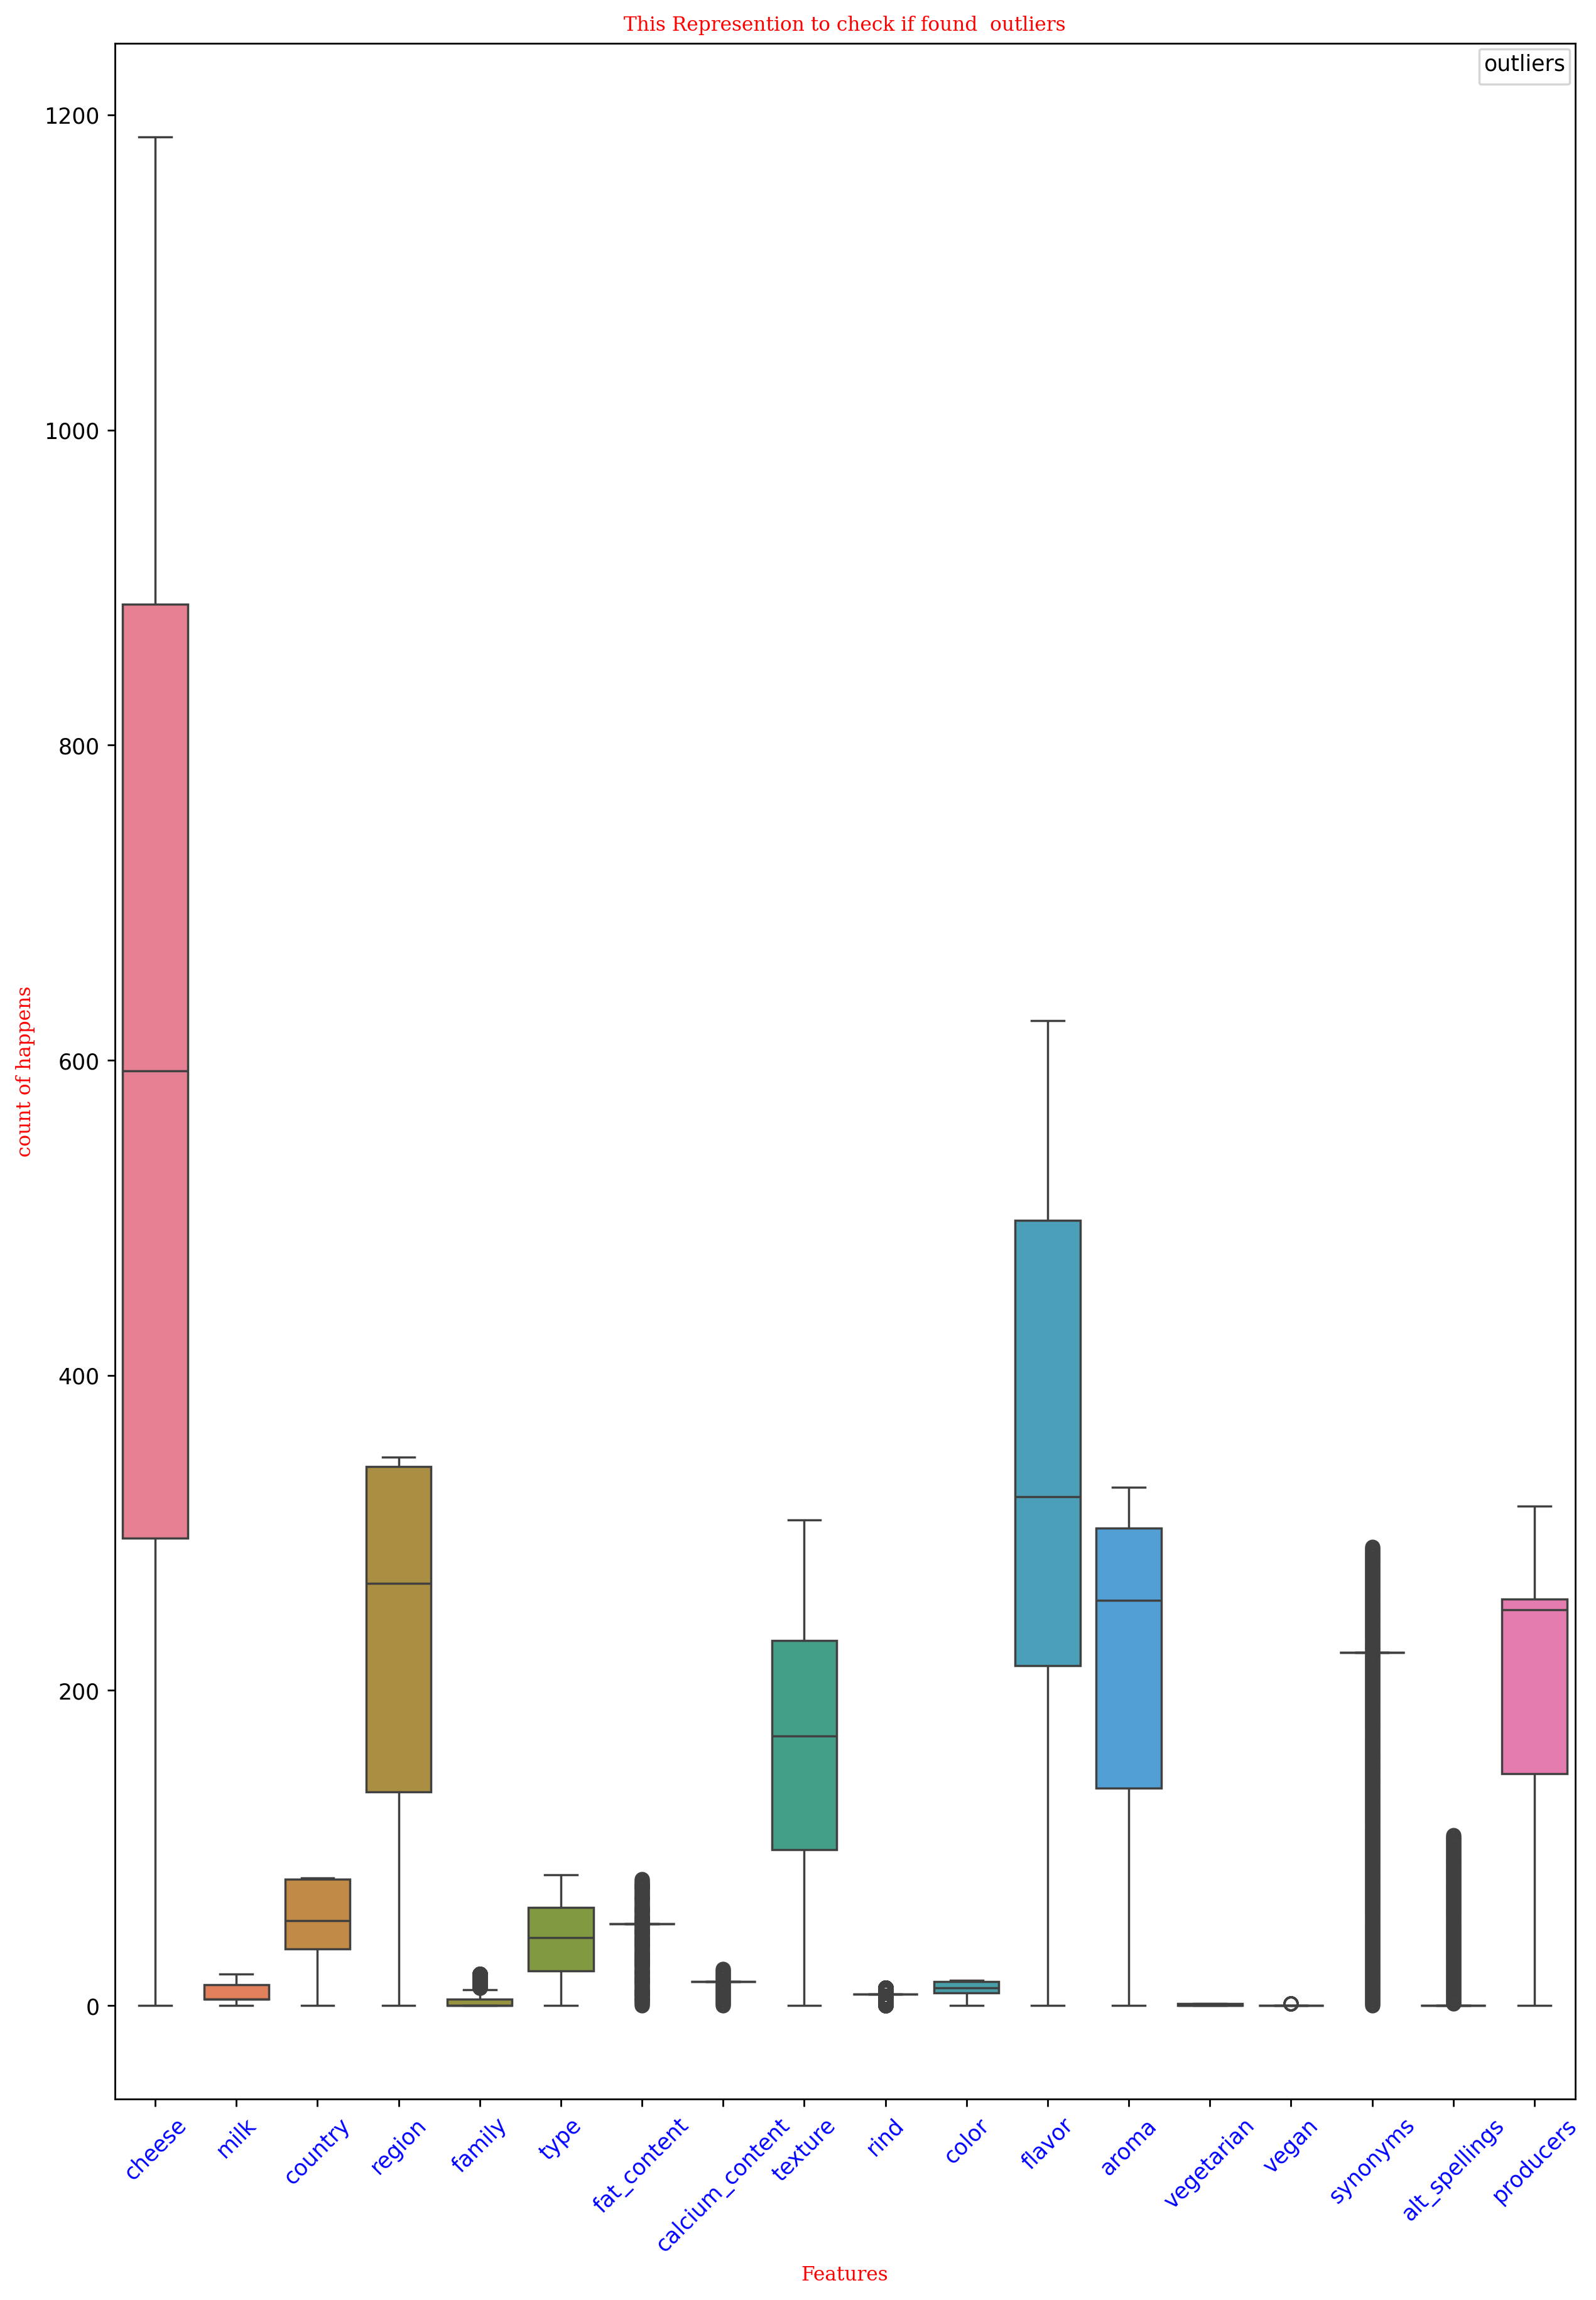

In [43]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(12,17),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  18.451183473706532
lower_limit :  -12.949919783731808
Mean Value :  2.750631844987363
Median Value :  0.0
1st Standard Deviation :  5.233517209573057


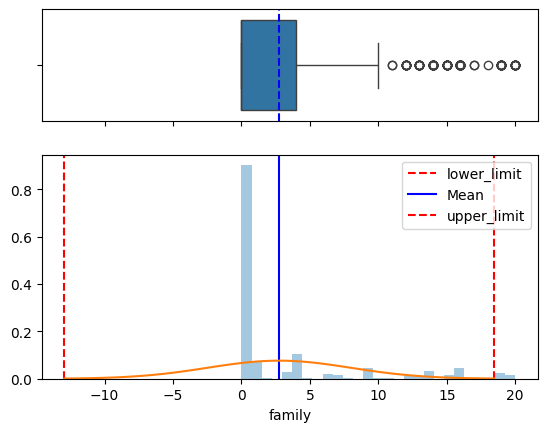

In [44]:
#Another way to calculate outlier on family feature:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.family.mean()
std = data.family.std()
median = data.family.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["family"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["family"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

upper_limit :  13.768906239830216
lower_limit :  0.16201204155141813
Mean Value :  6.965459140690817
Median Value :  7.0
1st Standard Deviation :  2.267815699713133


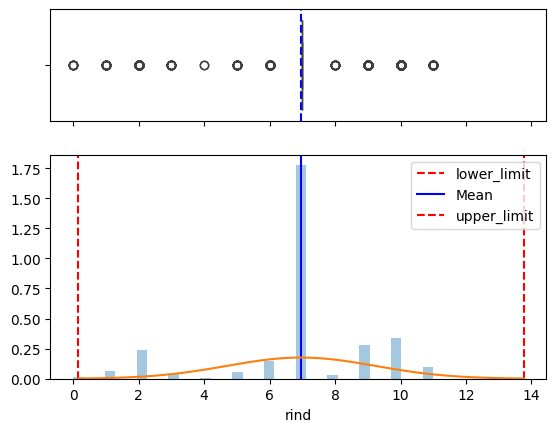

In [45]:
#Another way to calculate outlier on rind feature:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.rind.mean()
std = data.rind.std()
median = data.rind.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["rind"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["rind"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [46]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier":RandomForestClassifier(),
    "svm":svm.SVC(),
    "GaussianNB":GaussianNB()
}

**************************************************
Model: LogisticRegression
Mean Squared Error (MSE): 0.29411764705882354
model_accuracy: 70.59%
LogisticRegression Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       246
           1       0.71      0.09      0.16       111

    accuracy                           0.71       357
   macro avg       0.71      0.54      0.49       357
weighted avg       0.71      0.71      0.62       357



--------------------------------------------------
**************************************************
Model: DecisionTreeClassifier
Mean Squared Error (MSE): 0.2773109243697479
model_accuracy: 72.27%
DecisionTreeClassifier Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       246
           1       0.63      0.26      0.37       111

    accuracy                   

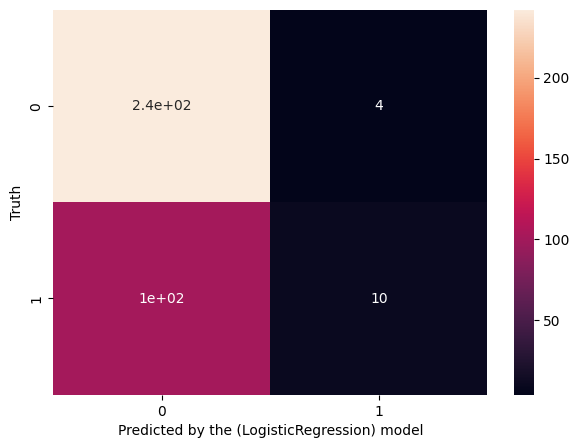

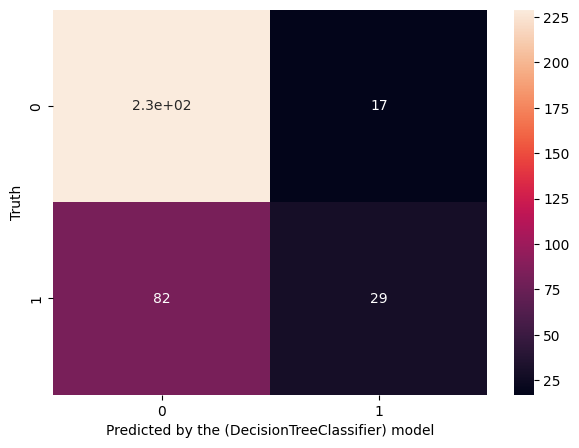

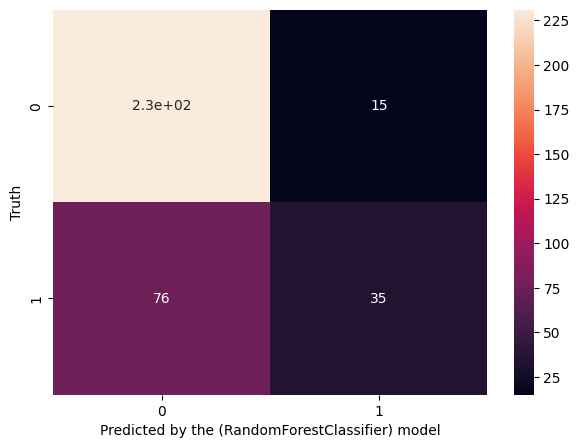

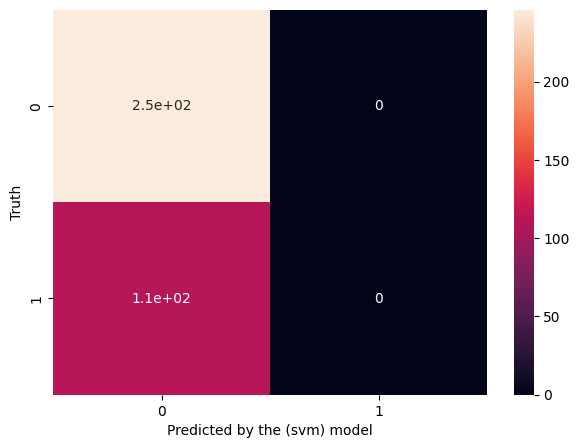

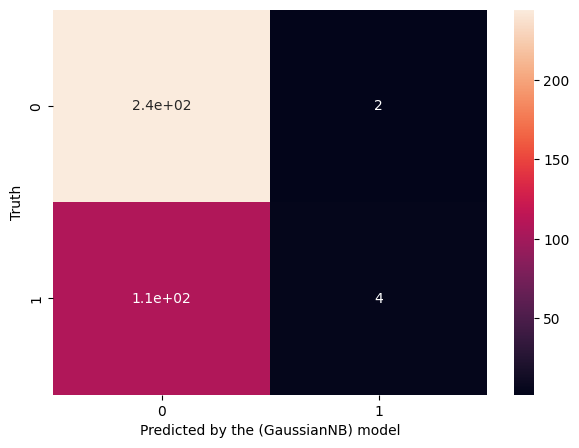

In [47]:
for model_name, model in models.items():
    # Fit the model to the training data
    
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    acc = model.score(x_test,y_test)
    
    print("*"*50)

    model_evaluation_metrics = {}
    # Calculate confusion matrix and classification report
    
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)
    
    # Storing the results
    model_evaluation_metrics[model_name] = {
        "Confusion Matrix":cm,
        'Classification Report': classif_report
    }
    
     
    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel(f"Predicted by the ({model_name}) model")
    plt.ylabel('Truth'),
    
    # Print the evaluation metrics for each model
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"model_accuracy: {acc*100:0.2f}%")
    print(f"{model_name} Evaluation Metrics:")
    print("\nClassification Report:")
    print(classif_report)
    print("\n" + "="*60 + "\n")
    print("-"*50)

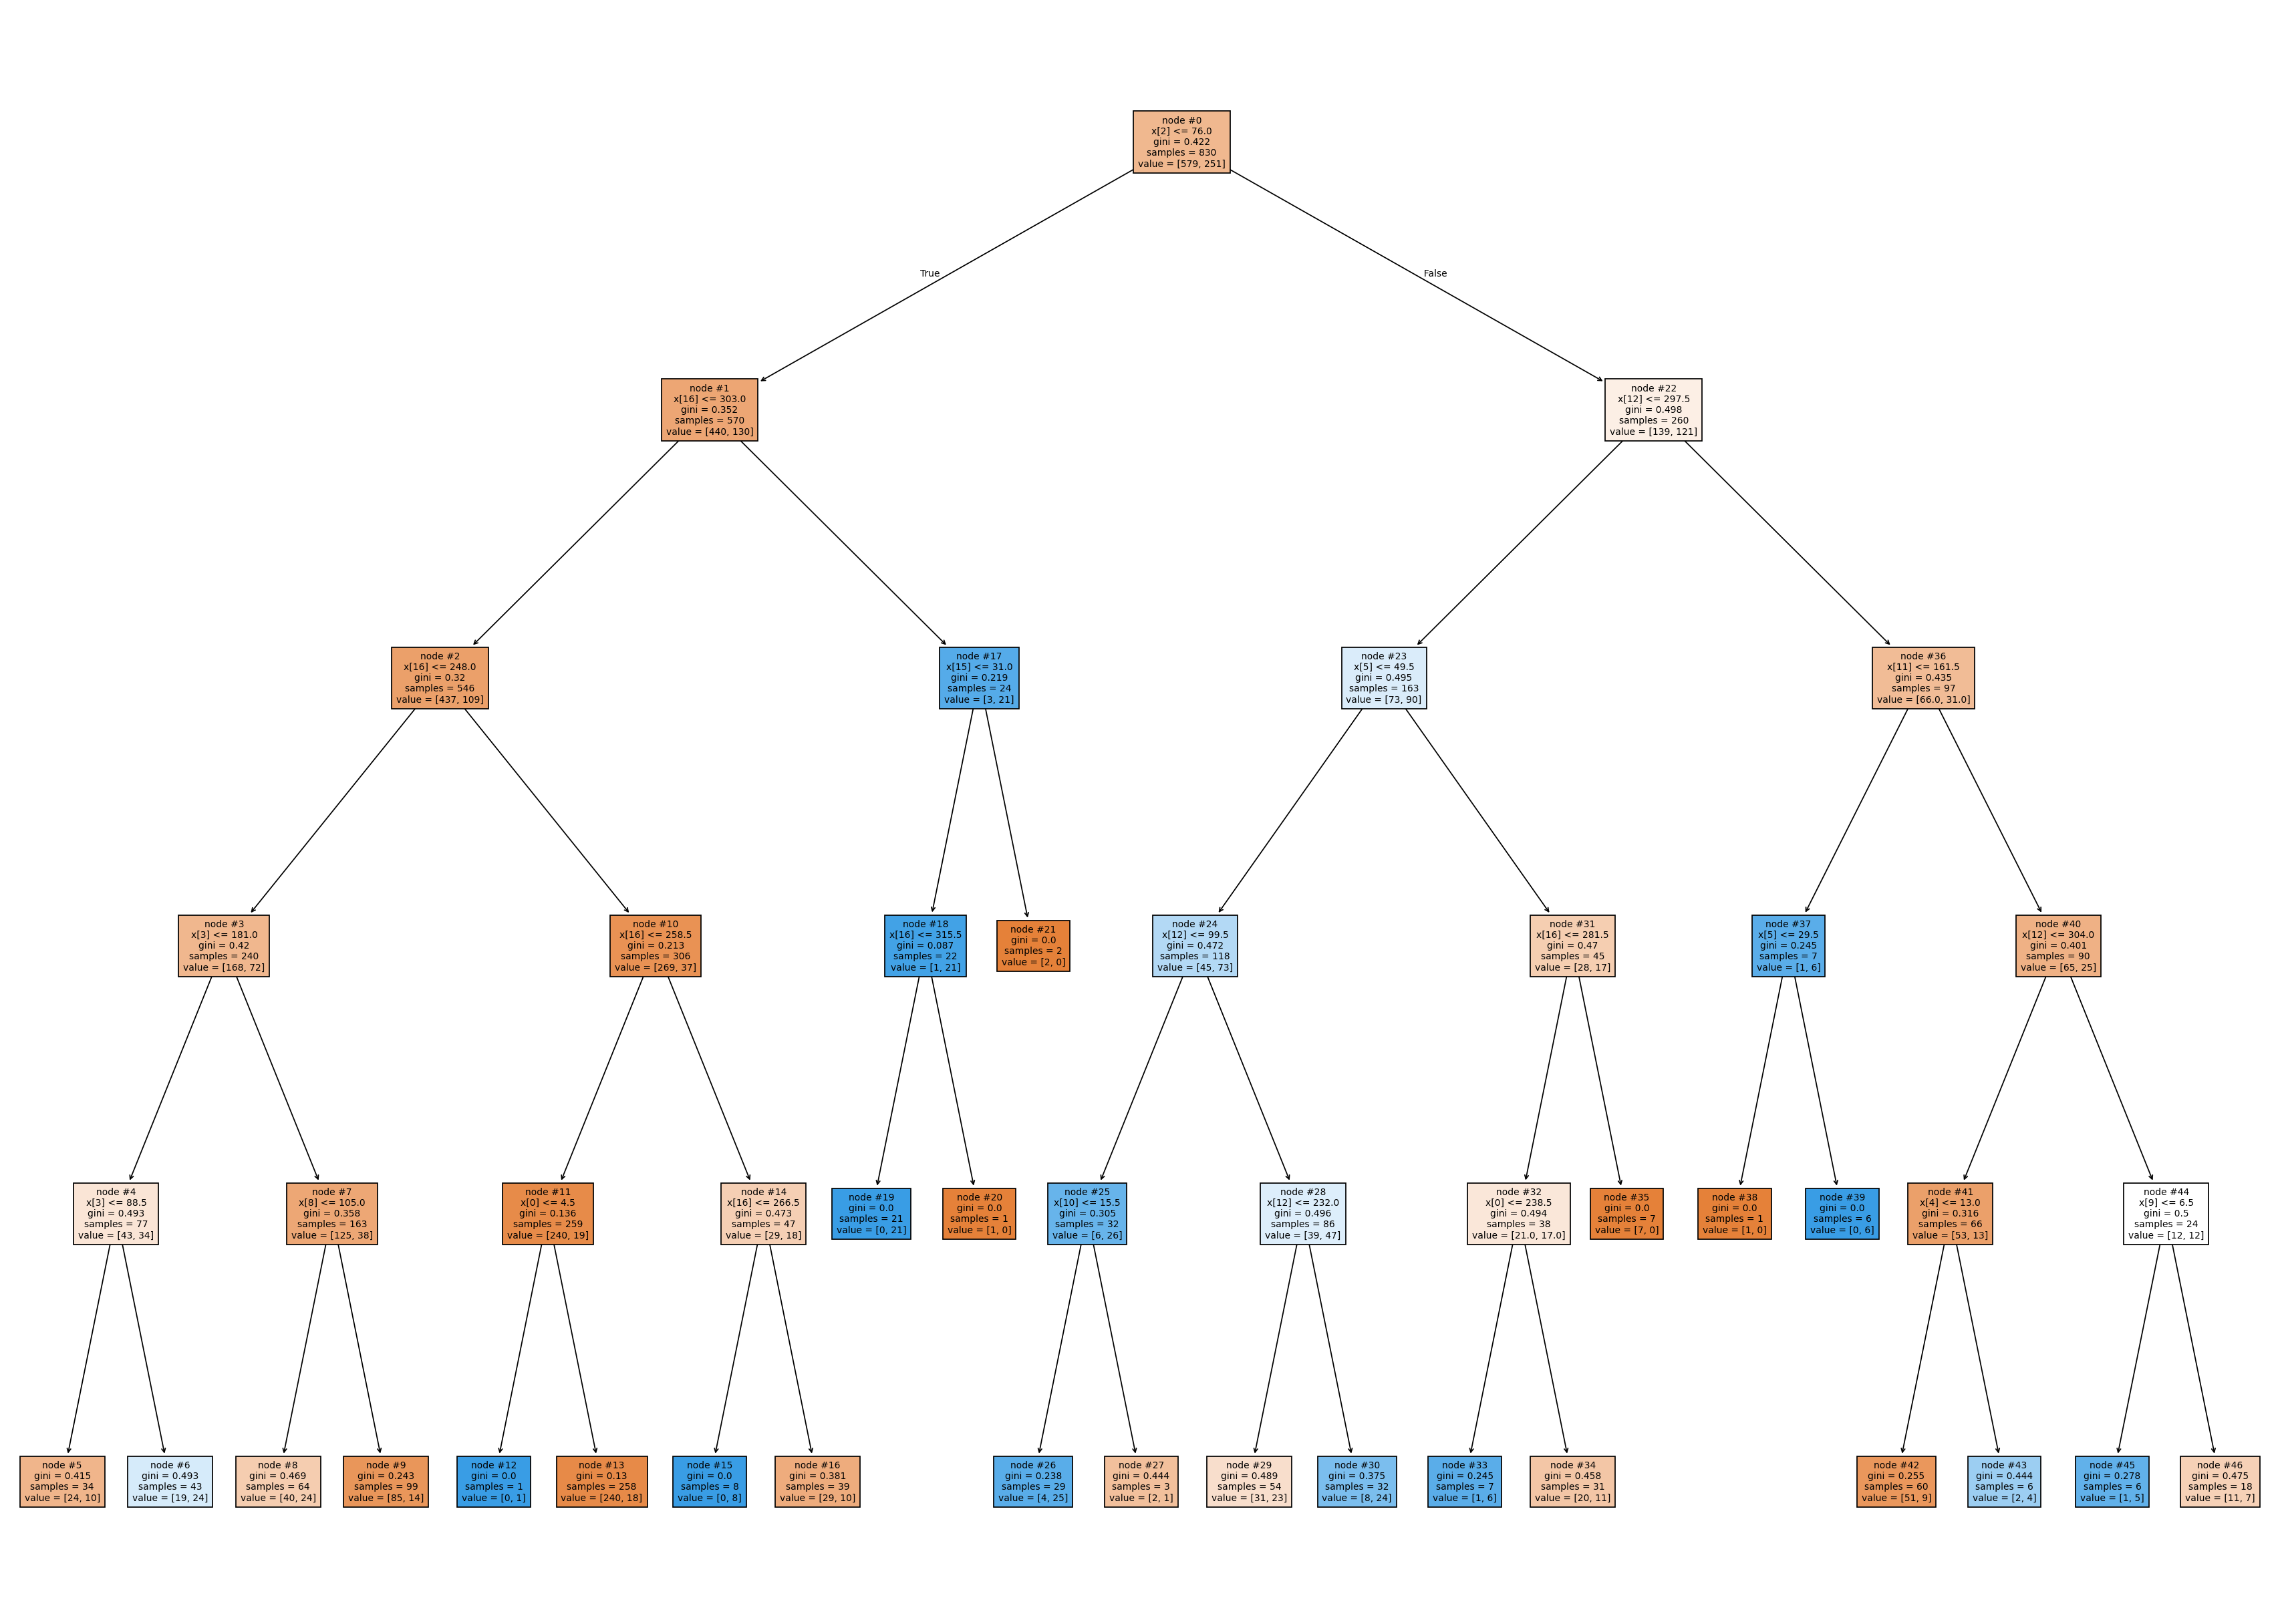

In [48]:
# Create the decision tree model
decision_tree_model = models["DecisionTreeClassifier"]

# Plot the tree
plt.figure(figsize=(35, 25), dpi=125)  # Adjust figure size as needed
tree.plot_tree(decision_tree_model, filled=True, node_ids=True, fontsize=8)
plt.show()

In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback

In [50]:
# Define a Callback class that stops training once accuracy reaches 99.9%

class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

In [51]:
# define layers :

model_r=Sequential([

    Input(shape=[17]),

    Dense(units=128,activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.1),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=512,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.3),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=1,activation="sigmoid",kernel_regularizer=l2(.01)),
            ])

model_r.summary()

# compile the model :
#compile:
model_r.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
  )

callbacks=myCallback()
history=model_r.fit(x_train,y_train,epochs=1000,batch_size=100,validation_split=0.1,callbacks=[callbacks])
history

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,497 (1.14 MB)

 Trainable params: 298,497 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5723 - loss: 29.7479 - val_accuracy: 0.7470 - val_loss: 13.5647
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6009 - loss: 14.5978 - val_accuracy: 0.7349 - val_loss: 9.2368
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6196 - loss: 11.4685 - val_accuracy: 0.3614 - val_loss: 8.9010
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5788 - loss: 10.4408 - val_accuracy: 0.6988 - val_loss: 8.2008
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5731 - loss: 9.1811 - val_accuracy: 0.7470 - val_loss: 7.9541
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6415 - loss: 8.8778 - val_accuracy: 0.3976 - val_loss: 7.9616
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5387 - loss: 8.5149 - val_accuracy: 0.6988 - val_loss: 7.4836
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6018 - loss: 8.1390 - val_accuracy: 0.6627 - 

In [52]:
# predict on the model:
y_p=model_r.predict(x_test)
y_p[:10]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.26121122],
       [0.7362807 ],
       [0.01610749],
       [0.82092005],
       [0.5186196 ],
       [0.00479737],
       [0.44467318],
       [0.32873657],
       [0.01633059],
       [0.32784042]], dtype=float32)

In [53]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 6.176494207466021e-05 
 the max_value for prediction --->>> 0.9894081354141235 


In [54]:
#Evalute the score:
model_r.evaluate(x_test,y_test,verbose=2)

12/12 - 0s - 3ms/step - accuracy: 0.6639 - loss: 1.0252


[1.0251556634902954, 0.6638655662536621]

In [55]:
# Save the model
model_r.save('cheese.h5')

# Load the trained model
model_r = tf.keras.models.load_model('cheese.h5')

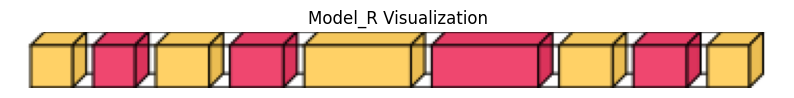

In [56]:
import visualkeras
from PIL import Image

# Save the visualization as an image file
visualization_path = 'model_visualization.png'
visualkeras.layered_view(model_r).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Model_R Visualization")
plt.axis('off')
plt.show()

In [ ]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()